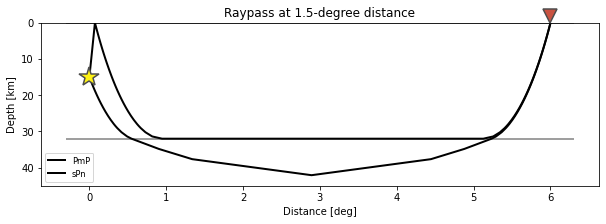

<AxesSubplot:title={'center':'Raypass at 1.5-degree distance'}, xlabel='Distance [deg]', ylabel='Depth [km]'>

In [25]:
### Sythetics for sP traveltime using obspy.taup
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
import matplotlib.pyplot as plt

#build_taup_model("./SingLayer.nd", output_folder="./")
model = TauPyModel("./SingLayer.npz")

arrivals1 = model.get_ray_paths(source_depth_in_km=15, distance_in_degree=6, phase_list=['PmP', 'sPn'])

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-0,45)
ax.set_title("Raypass at 1.5-degree distance")
ax.invert_yaxis()
arrivals1.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


# 1. Random sP, P plots

	Fixed Source Depth of 10 km.



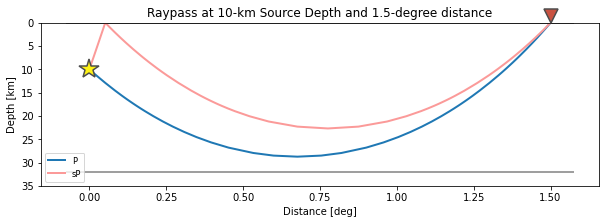

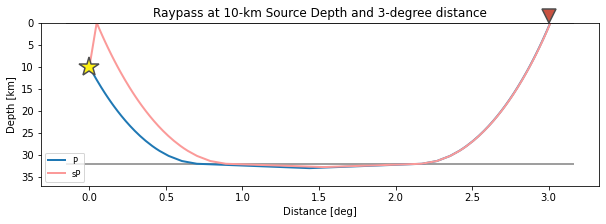

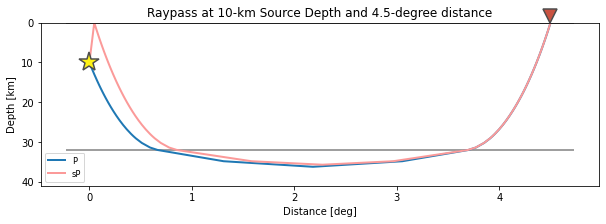

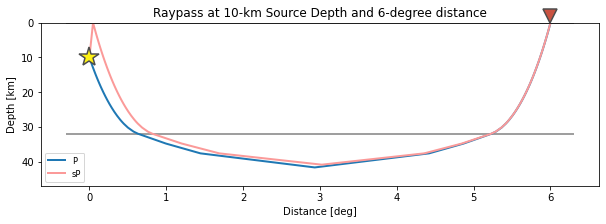

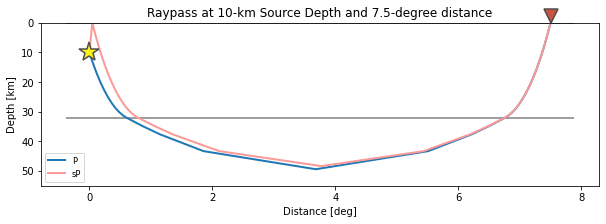

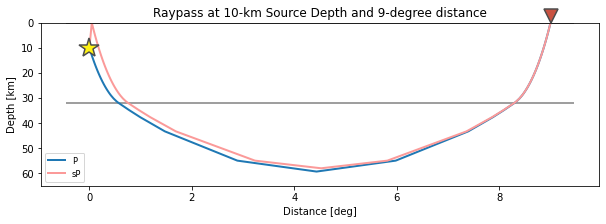

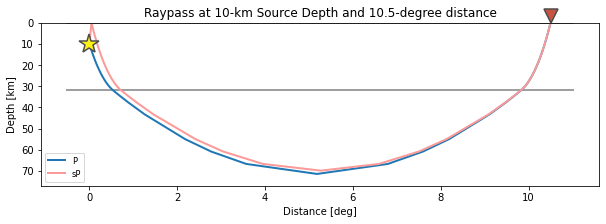

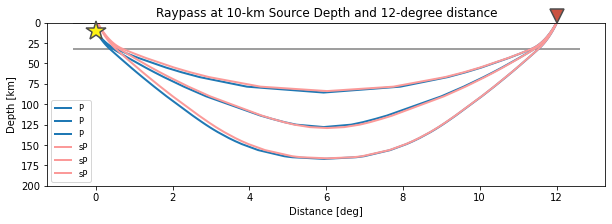



					END




	Fixed Source Depth of 12 km.



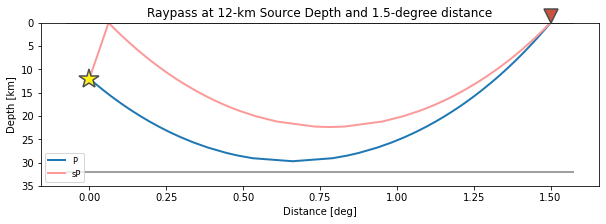

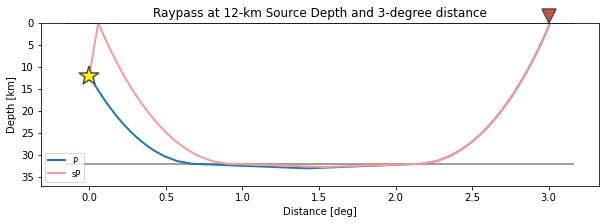

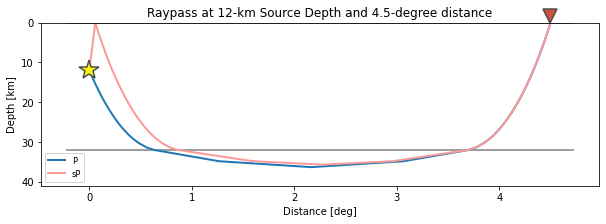

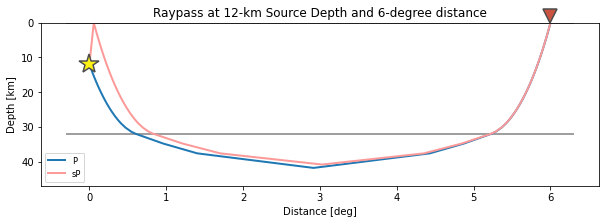

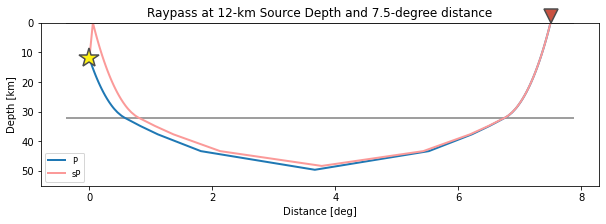

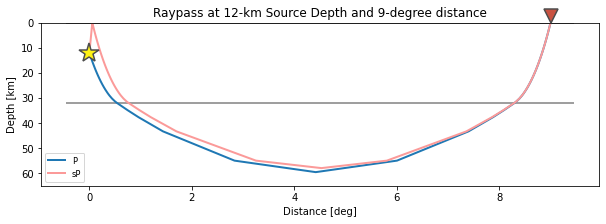

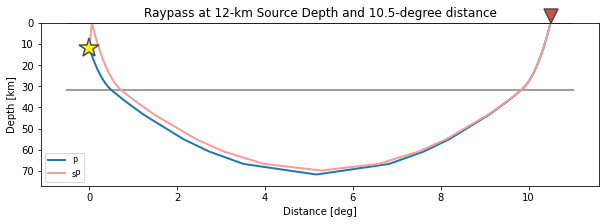

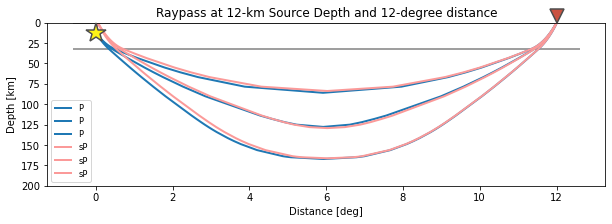



					END




	Fixed Source Depth of 14 km.



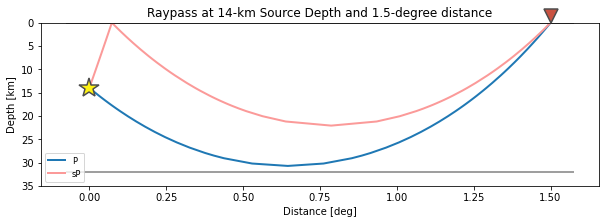

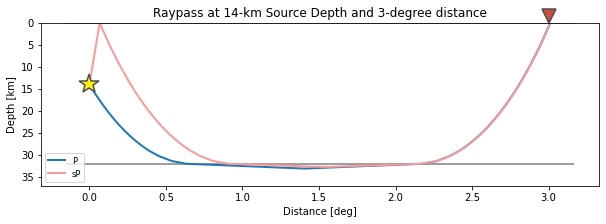

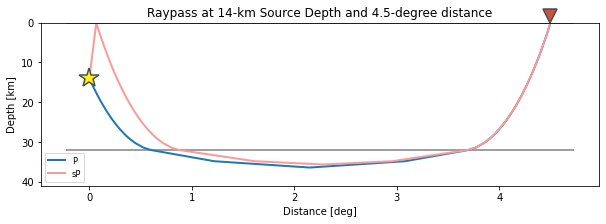

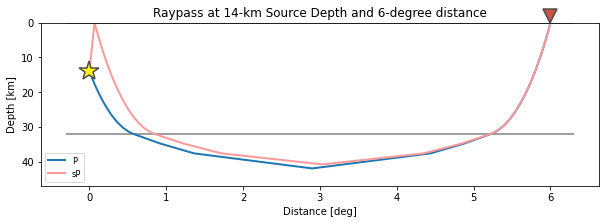

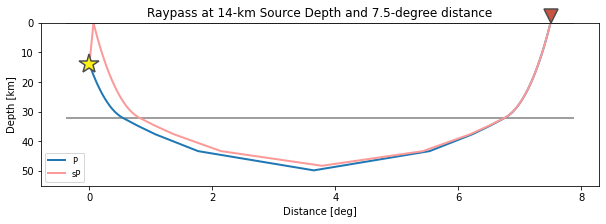

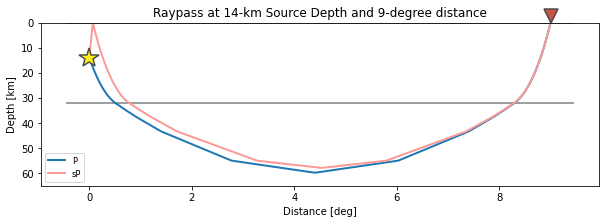

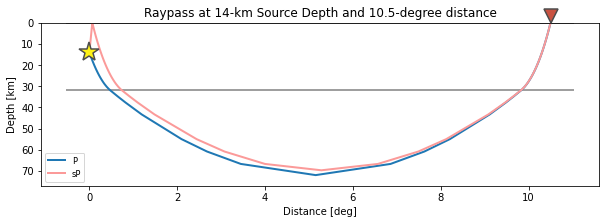

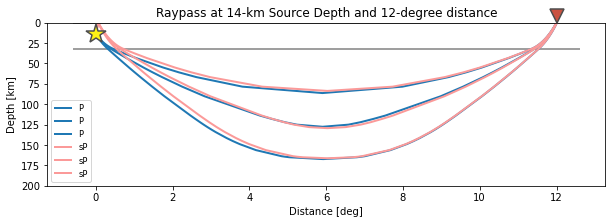



					END




	Fixed Source Depth of 16 km.



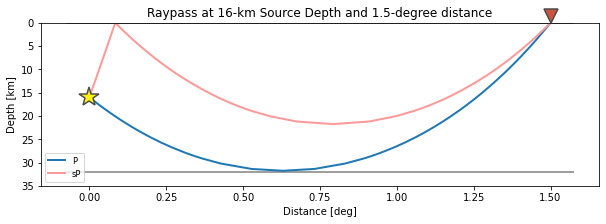

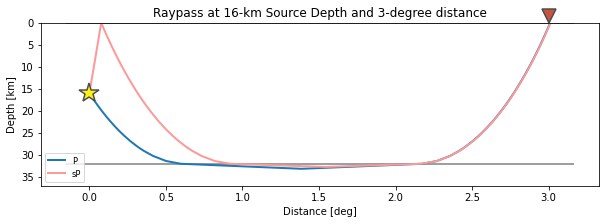

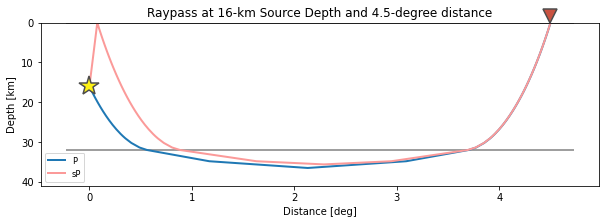

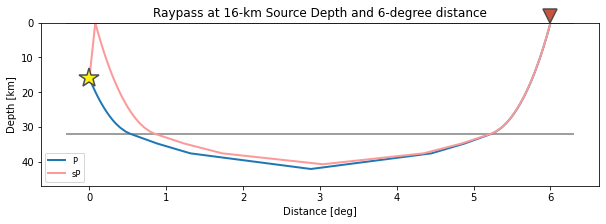

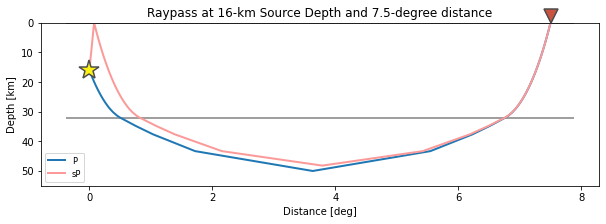

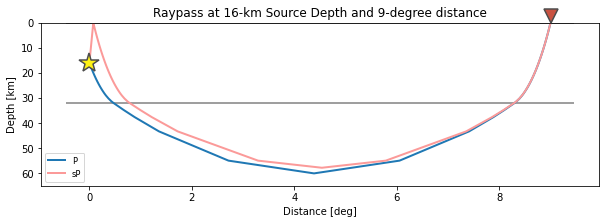

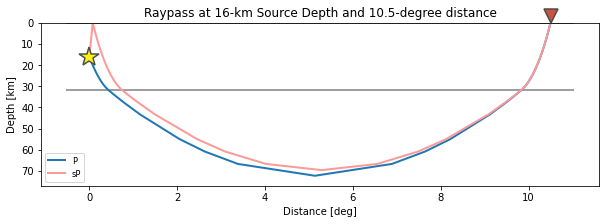

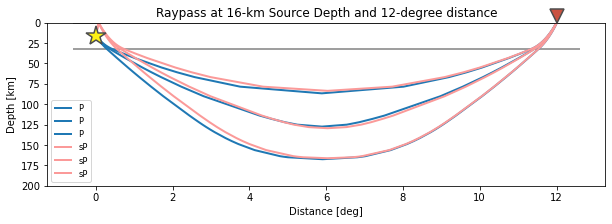



					END




	Fixed Source Depth of 18 km.



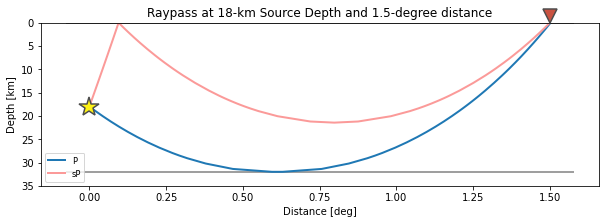

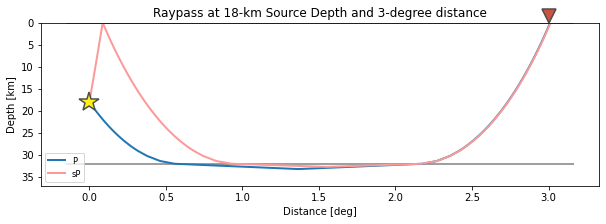

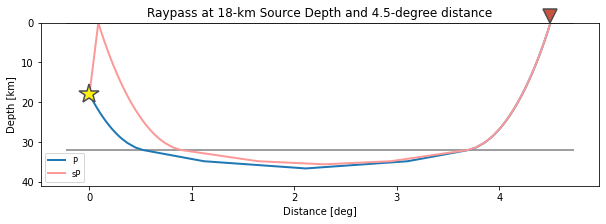

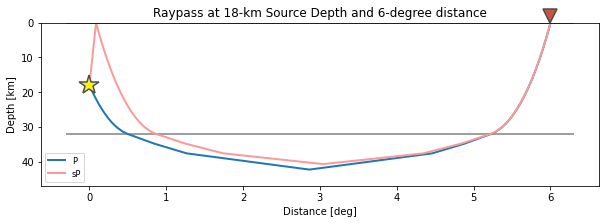

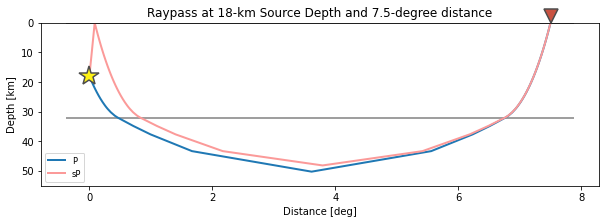

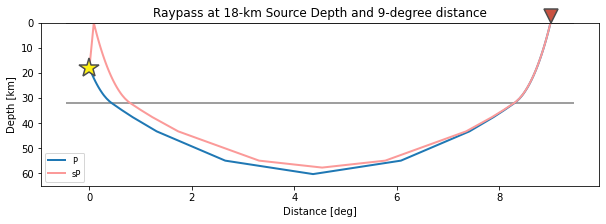

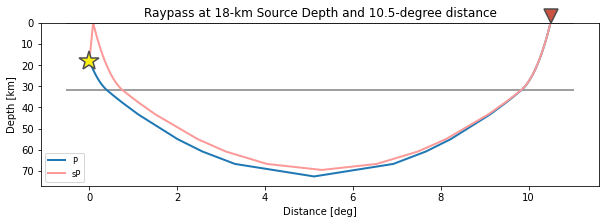

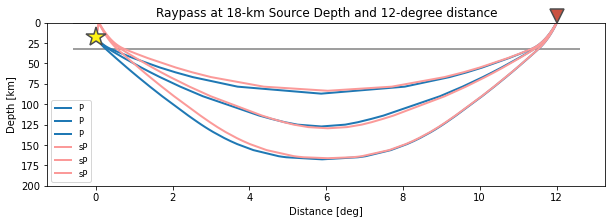



					END




	Fixed Source Depth of 20 km.



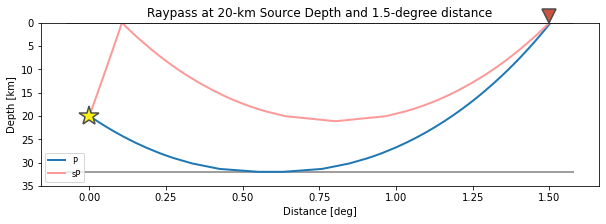

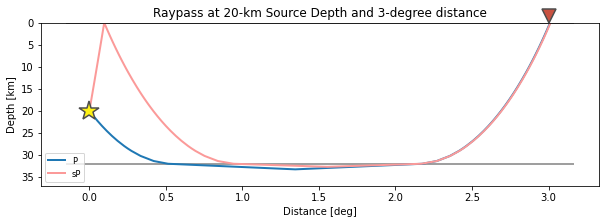

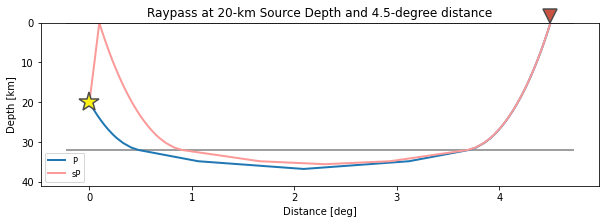

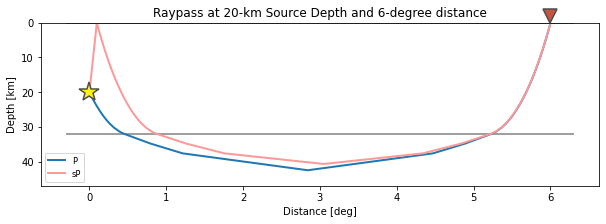

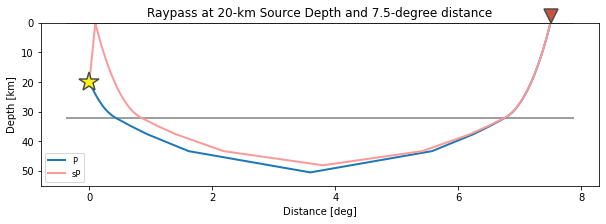

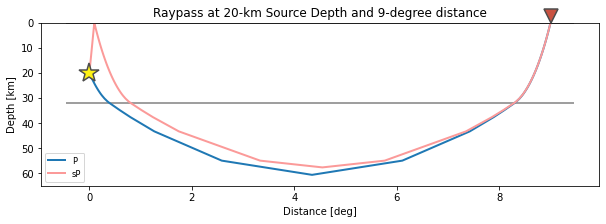

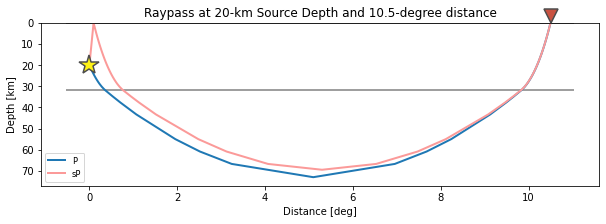

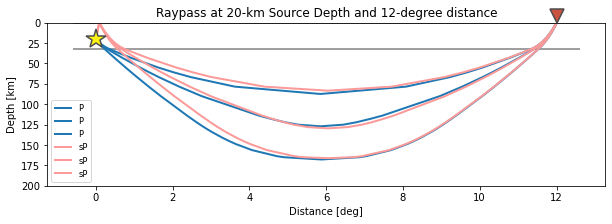



					END




	Fixed Source Depth of 22 km.



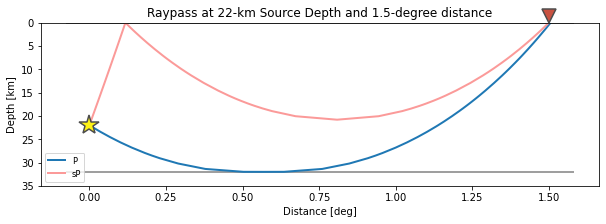

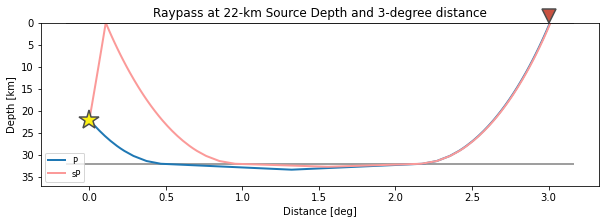

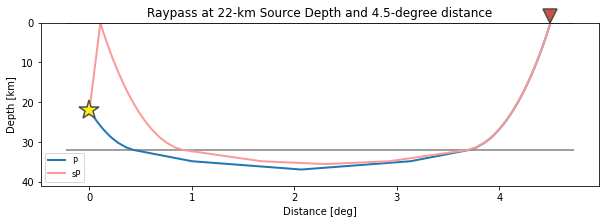

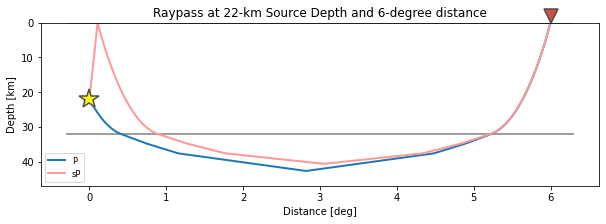

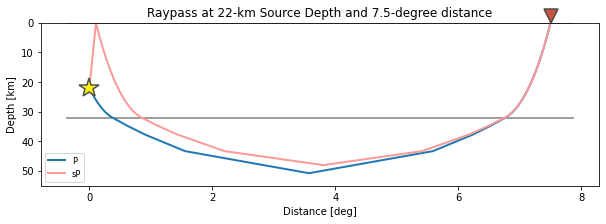

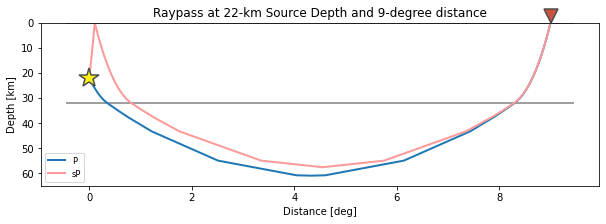

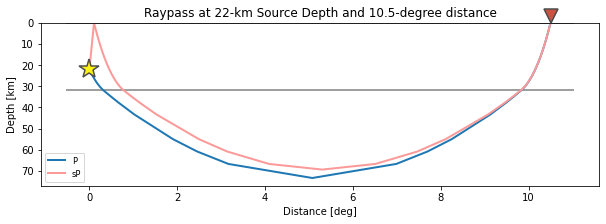

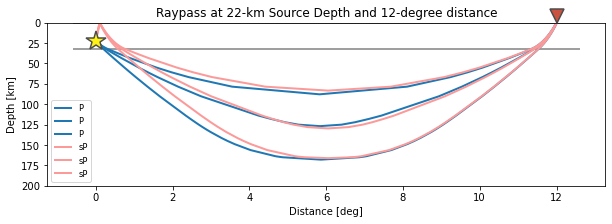



					END




	Fixed Source Depth of 24 km.



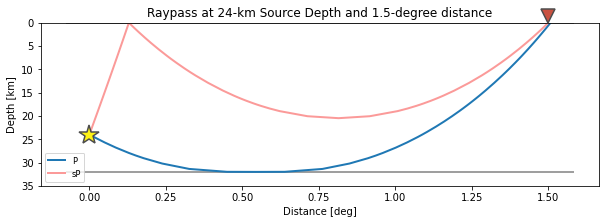

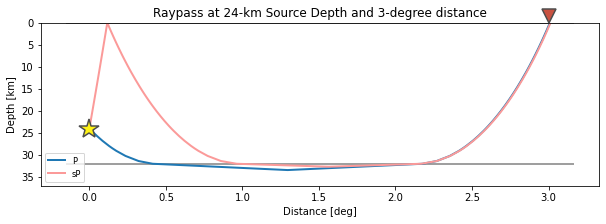

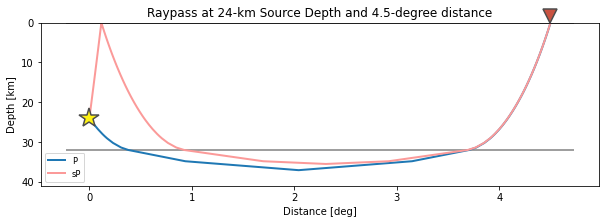

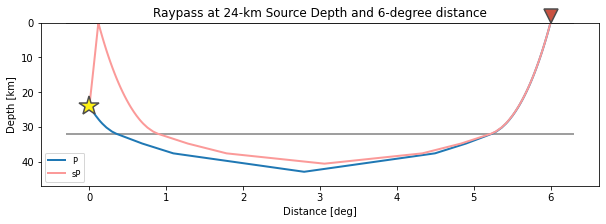

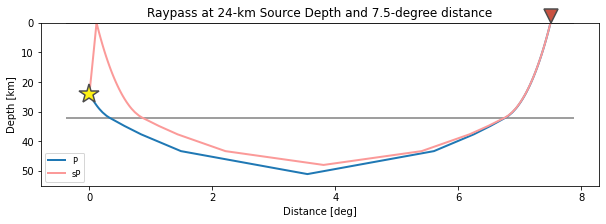

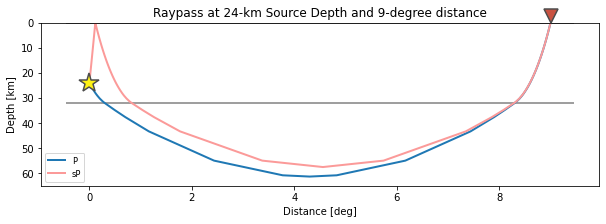

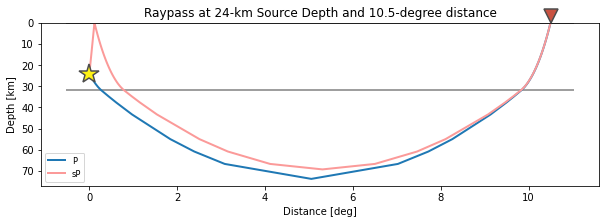

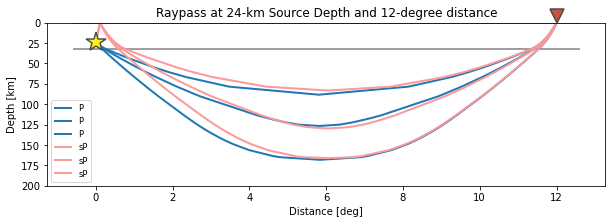



					END






In [26]:
import time
source_dep = [10, 12, 14, 16, 18, 20, 22, 24]
dist_deg = [1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12]

for i in source_dep:
    k = 35
    c = 1
    print("\tFixed Source Depth of",i, "km.")
    print()
    for j in dist_deg:
        if(c==8):
            k = 200
            
        arrivals3 = model.get_ray_paths(source_depth_in_km= i, distance_in_degree=j, phase_list=['sP','P'])

        fig, ax = plt.subplots(figsize=(10, 3))
        ax.set_title("Raypass at "+str(i)+"-km Source Depth and "+str(j)+ "-degree distance")
        ax.set_ylim(-0,k)
        ax.invert_yaxis()
        arrivals3.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)
        k+=c*2
        c+=1
    print("\n\n\t\t\t\t\tEND\n\n\n\n")

# Reproducing Ma's Paper Time Travelpaths

## 1.1 Fixed Focal Depth of 12 km and distances ranging from 0.3 - 2.0 degrees

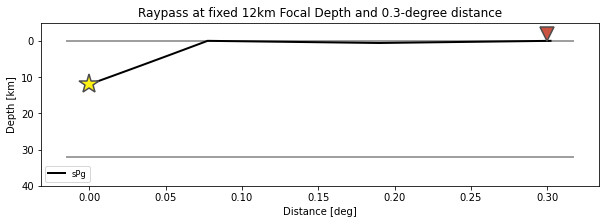

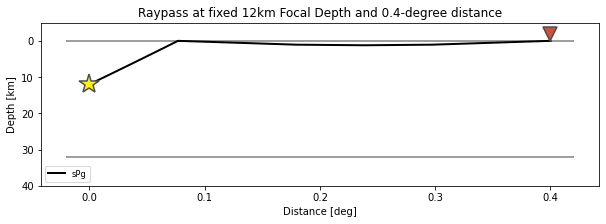

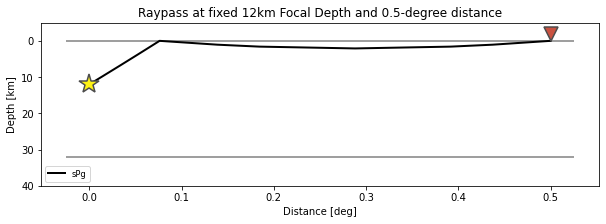

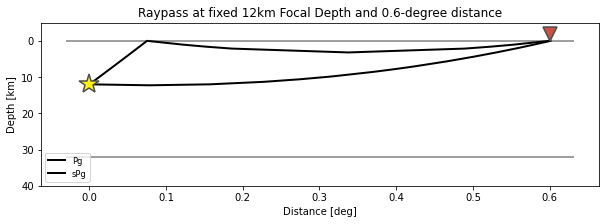

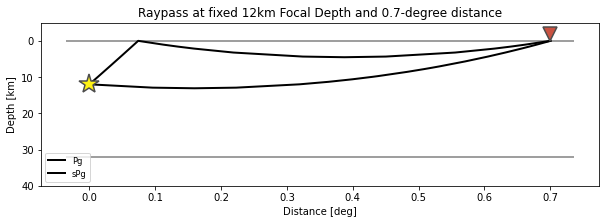

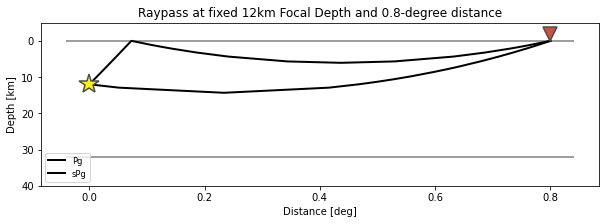

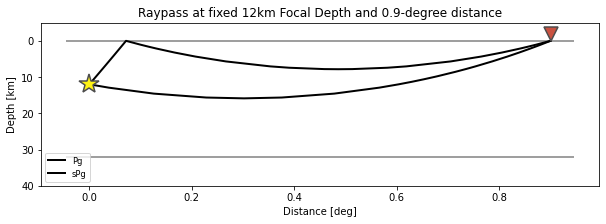

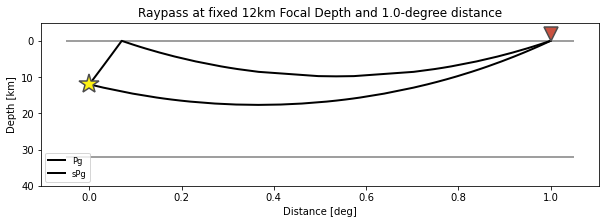

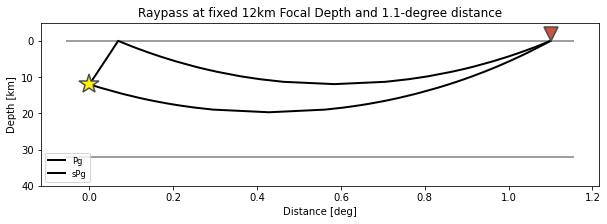

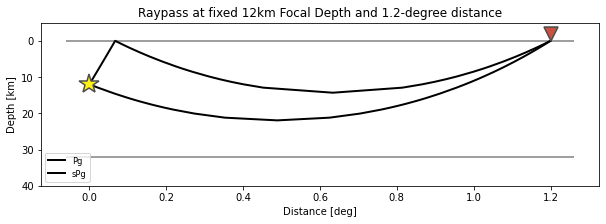

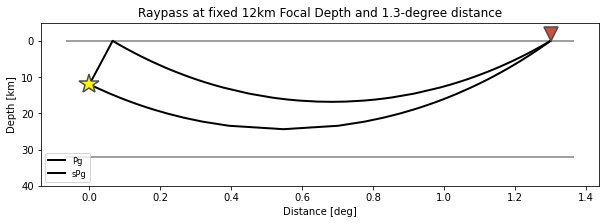

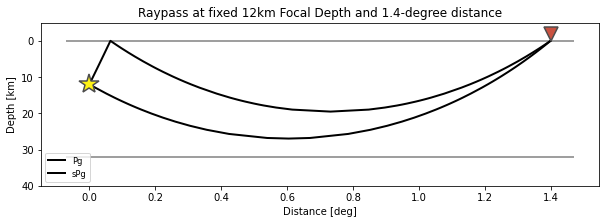

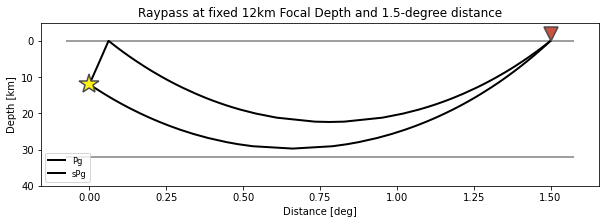

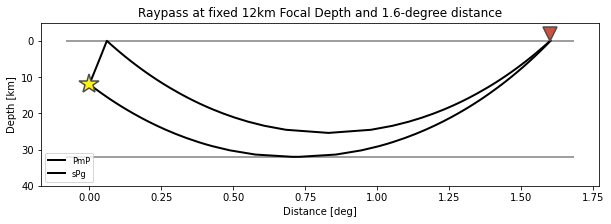

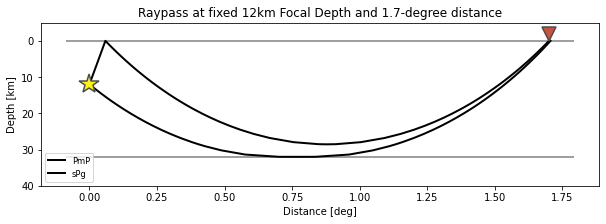

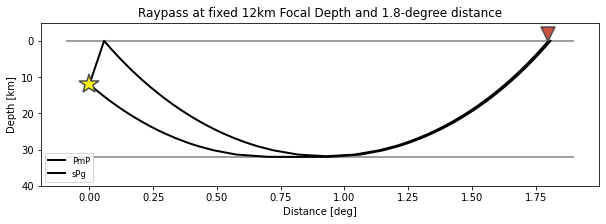

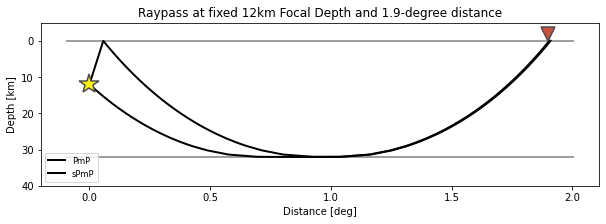

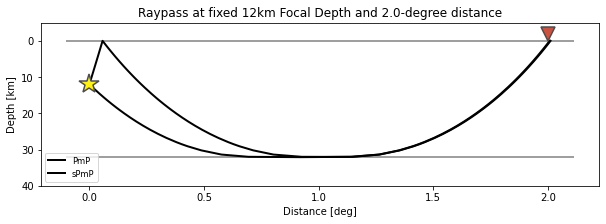

In [27]:
import numpy as np
case121_degrees = np.arange(0.3, 2.1, 0.1)

for i in case121_degrees:
    arrivals_121 = model.get_ray_paths(source_depth_in_km= 12, distance_in_degree=i, phase_list=['sPg','Pg','sPmP','PmP'])

    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_ylim(-5,40)
    ax.set_title("Raypass at fixed 12km Focal Depth and "+str(i)+"-degree distance")
    ax.invert_yaxis()
    arrivals_121.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


0.3 - 0.5 -> sPg

0.5 - 1.5 -> sPg, Pg

1.6 - 1.8 -> PmP, sPg

1.9 - 2.0 -> PmP, sPmP

In [28]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in case121_degrees:
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=12, distance_in_degree=dist, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=12, distance_in_degree=dist, phase_list=["sP"])[0].time)


	Fixed 12km focal depth and Epicentral distance 0.3-2 degree


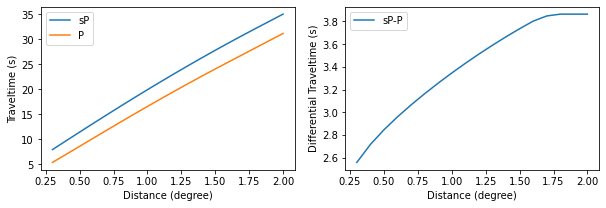

In [29]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
print("\n\tFixed 12km focal depth and Epicentral distance 0.3-2 degree")
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Distance (degree)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Distance (degree)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()

## 1.2 Fixed Focal Depth of 12 km and distances ranging from 1 - 3 degrees

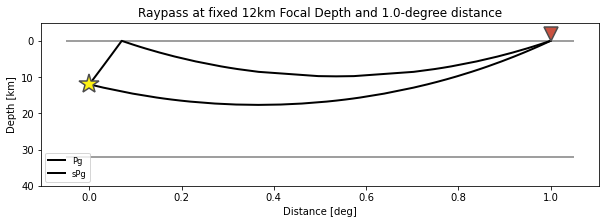

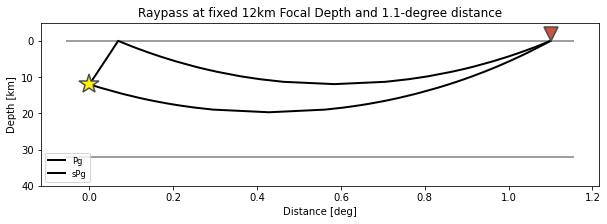

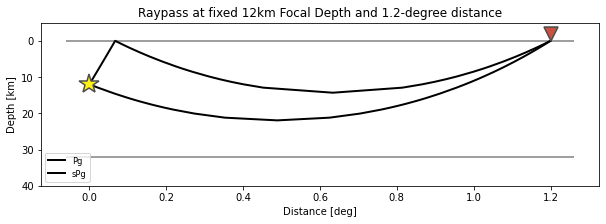

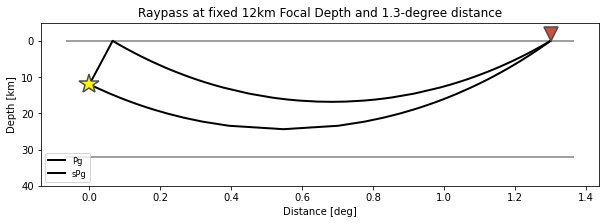

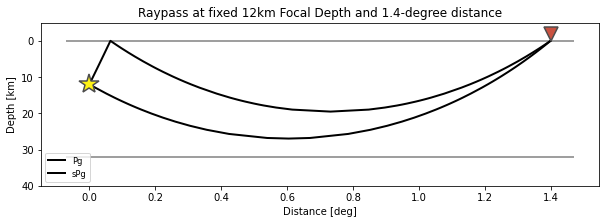

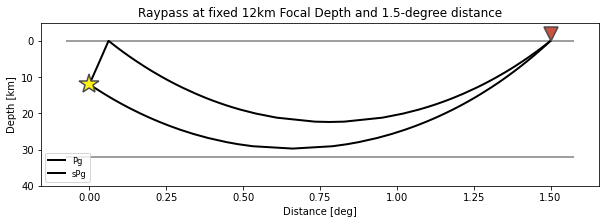

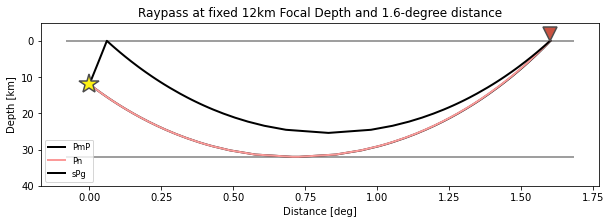

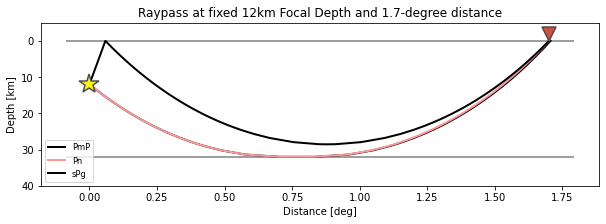

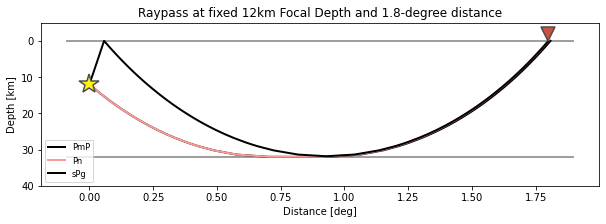

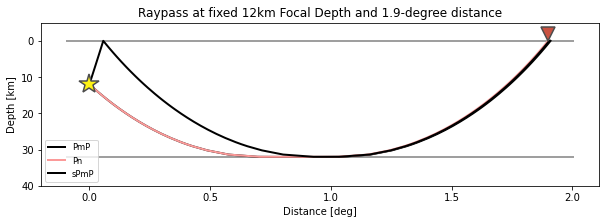

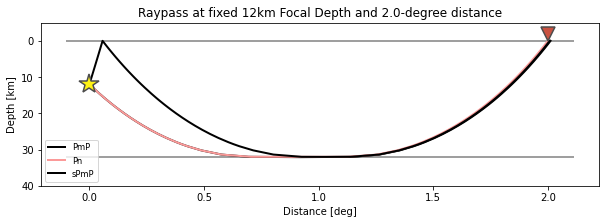

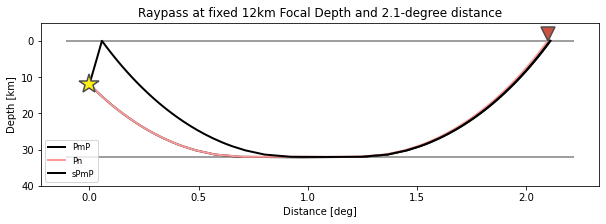

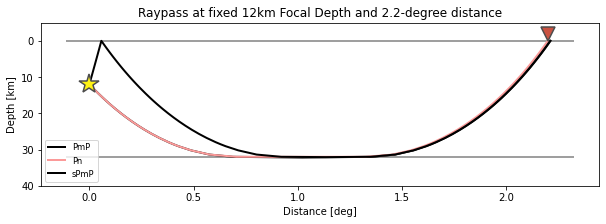

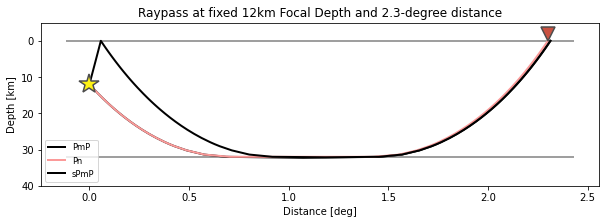

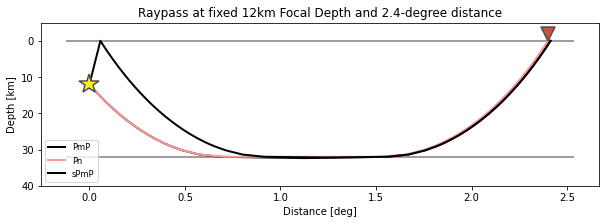

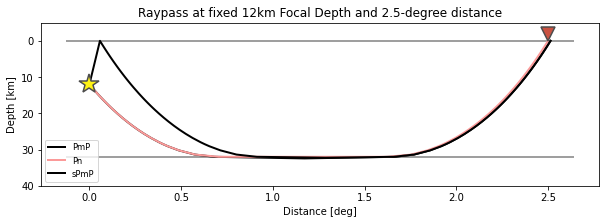

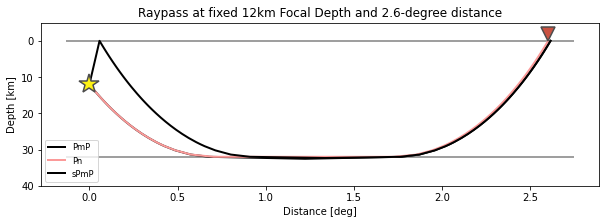

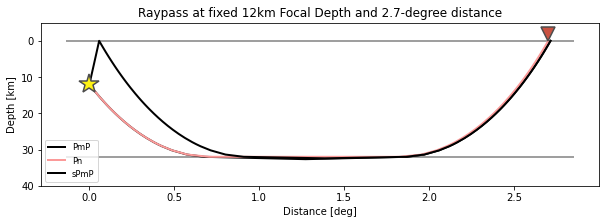

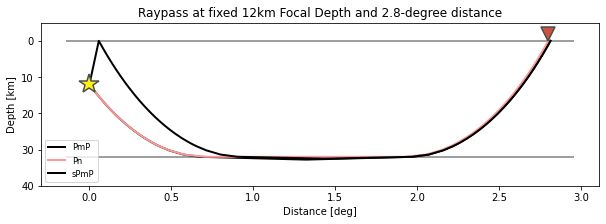

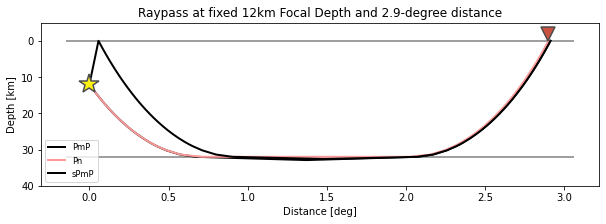

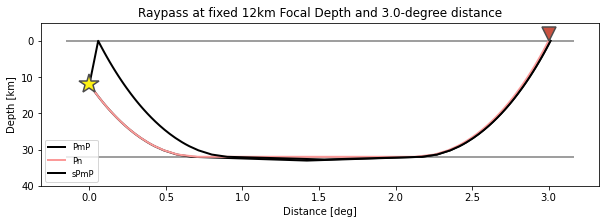

In [30]:
import numpy as np
case122_degrees = np.arange(1, 3.1, 0.1)

for i in case122_degrees:
    arrivals_122 = model.get_ray_paths(source_depth_in_km= 12, distance_in_degree=i, phase_list=['sPg','Pg', 'sPmP', 'PmP', 'Pn'])

    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_ylim(-5,40)
    ax.set_title("Raypass at fixed 12km Focal Depth and "+str(i)+"-degree distance")
    ax.invert_yaxis()
    arrivals_122.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


In [31]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in case122_degrees:
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=12, distance_in_degree=dist, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=12, distance_in_degree=dist, phase_list=["sP"])[0].time)


	Fixed 12km focal depth and Epicentral distance 1-3 degree


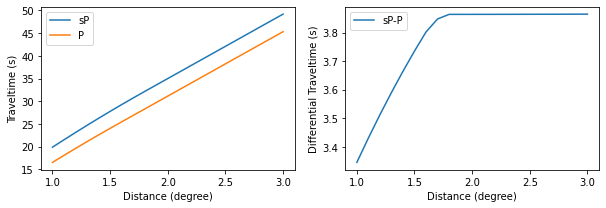

In [32]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
print("\n\tFixed 12km focal depth and Epicentral distance 1-3 degree")
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Distance (degree)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Distance (degree)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()

## 1.3 Fixed Focal Depth of 12 km and distances ranging from 2.0-4.8 degrees

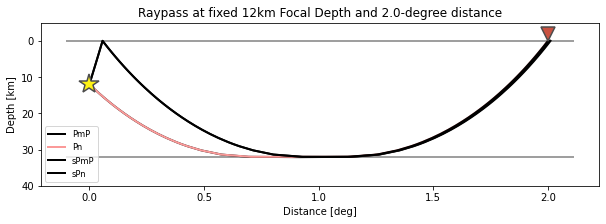

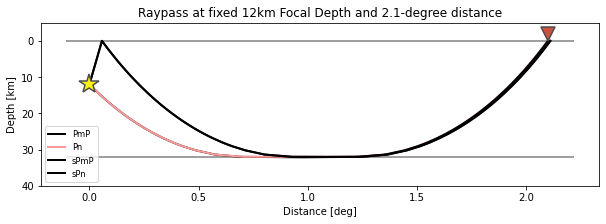

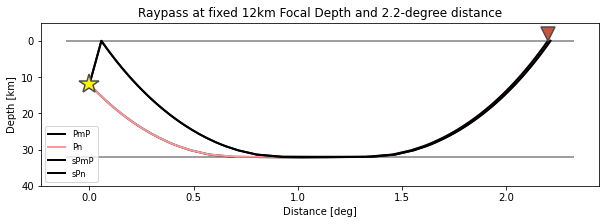

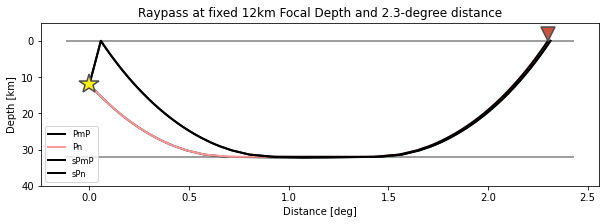

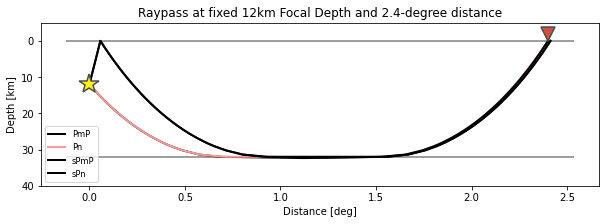

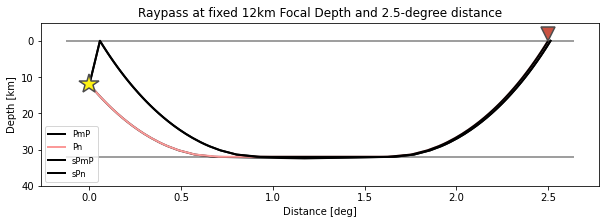

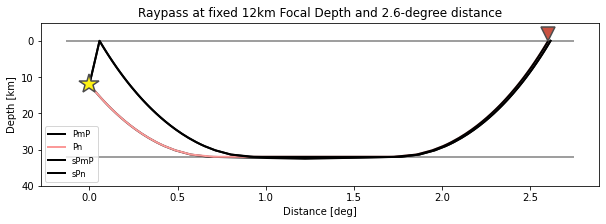

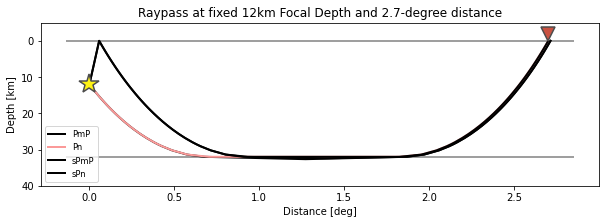

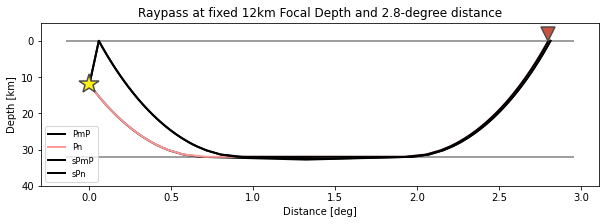

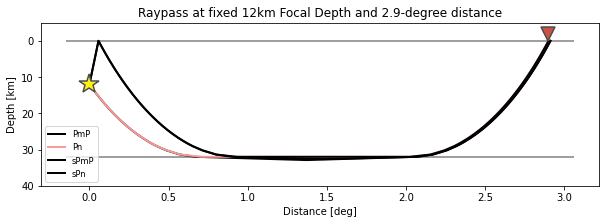

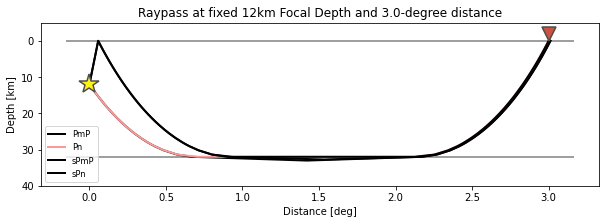

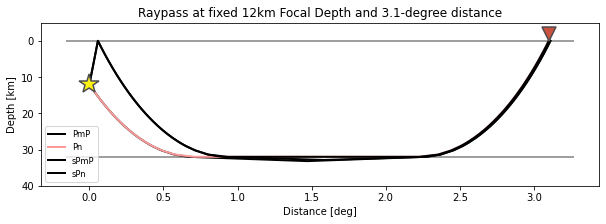

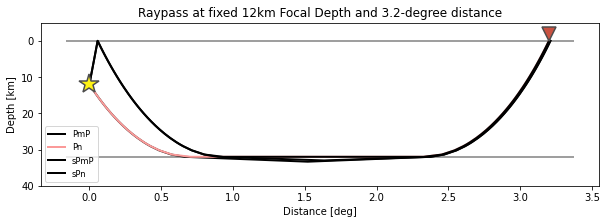

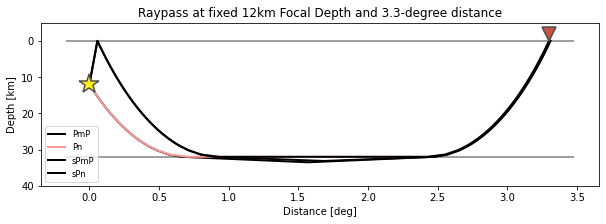

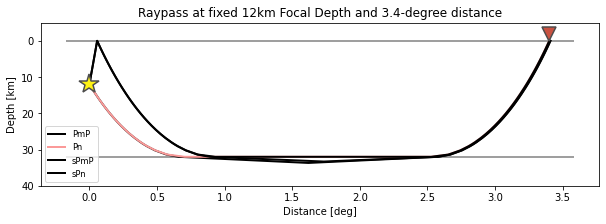

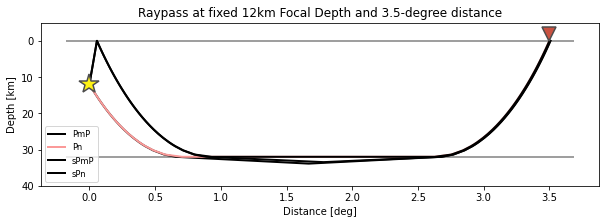

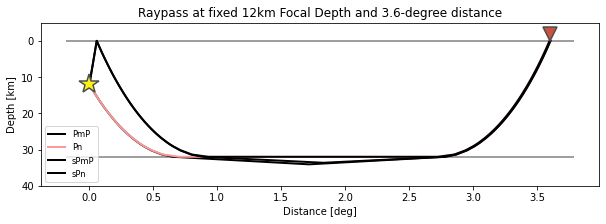

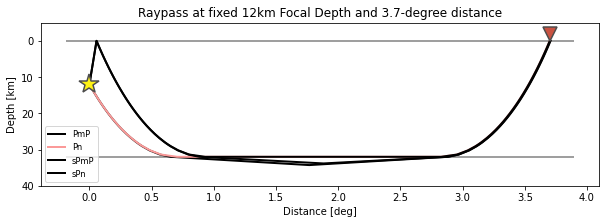

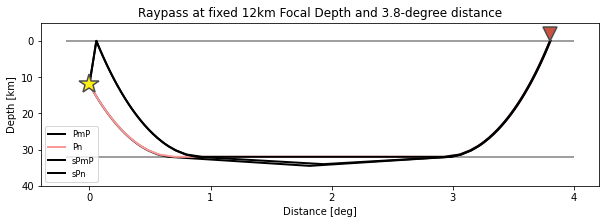

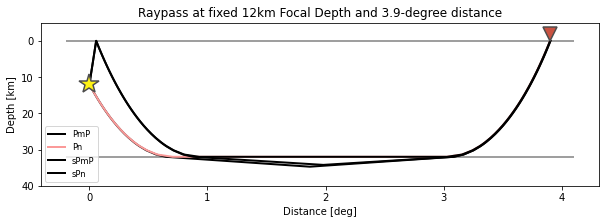

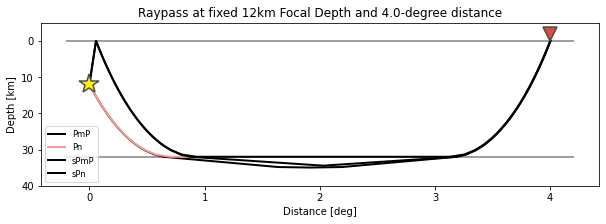

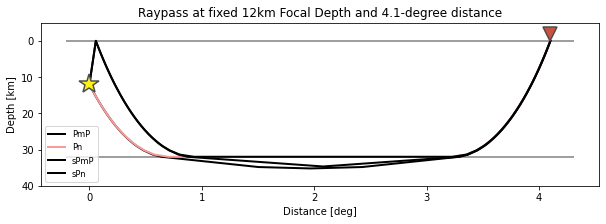

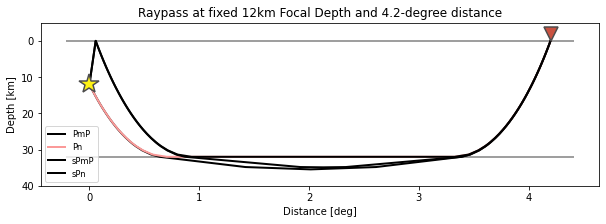

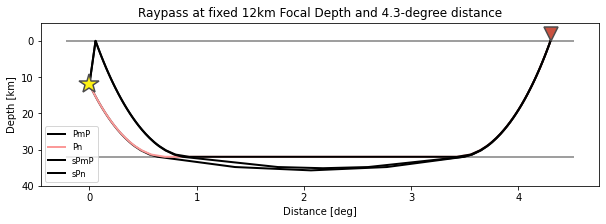

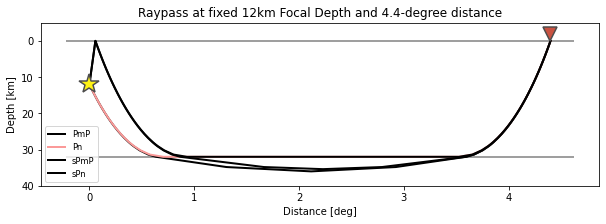

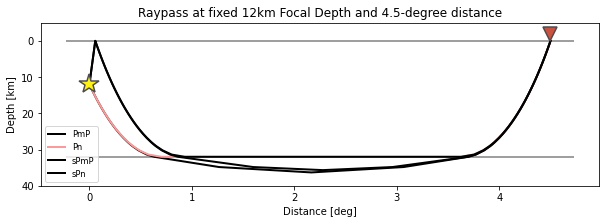

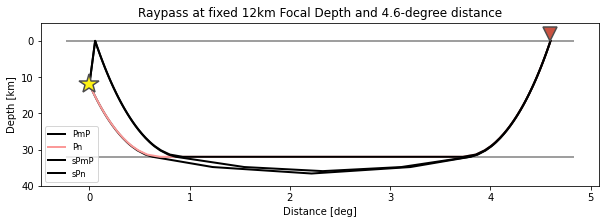

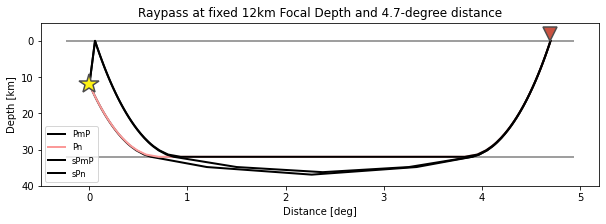

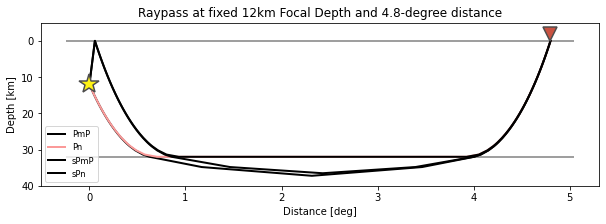

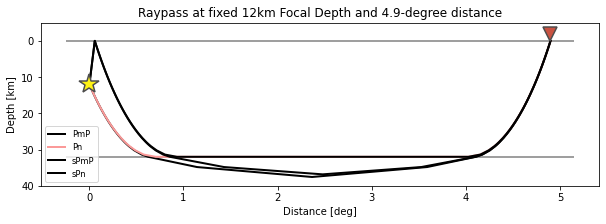

In [33]:
import numpy as np
case123_degrees = np.arange(2.0, 4.9, 0.1)

for i in case123_degrees:
    arrivals_123 = model.get_ray_paths(source_depth_in_km= 12, distance_in_degree=i, phase_list=['sPmP', 'PmP', 'Pn', 'sPn'])

    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_ylim(-5,40)
    ax.set_title("Raypass at fixed 12km Focal Depth and "+str(i)+"-degree distance")
    ax.invert_yaxis()
    arrivals_123.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


In [34]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in case123_degrees:
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=12, distance_in_degree=dist, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=12, distance_in_degree=dist, phase_list=["sP"])[0].time)


	Fixed 12km focal depth and Epicentral distance 2-4.8 degree


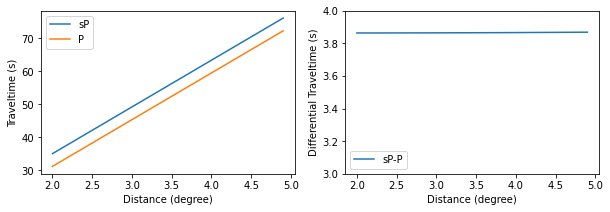

In [35]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
print("\n\tFixed 12km focal depth and Epicentral distance 2-4.8 degree")
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Distance (degree)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Distance (degree)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()
plt.ylim(3, 4)
plt.show()

## 2.1 Fixed Epicentral Distance of 0.9 degrees and Focal Depth range 1 to 33 km

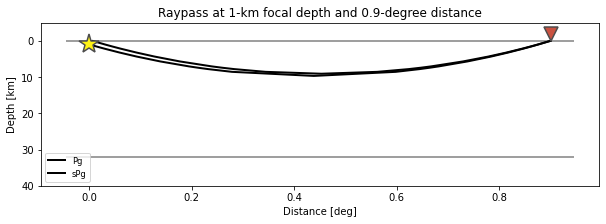

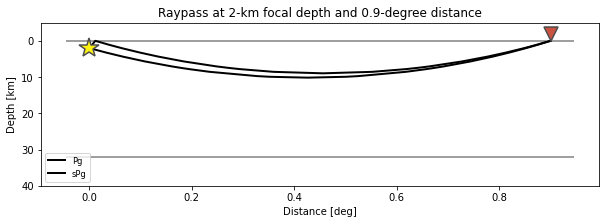

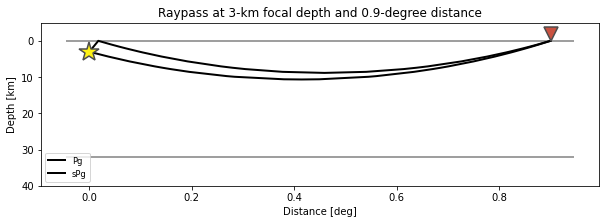

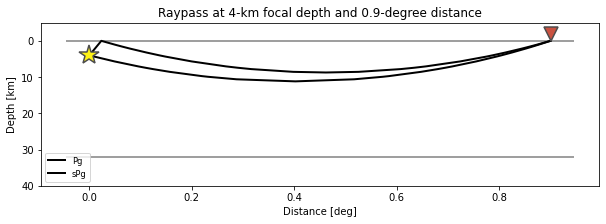

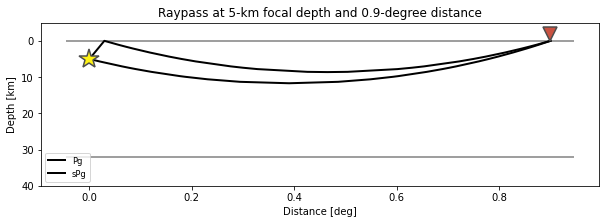

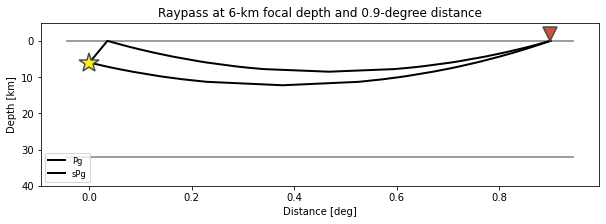

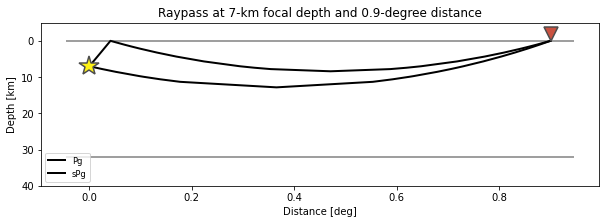

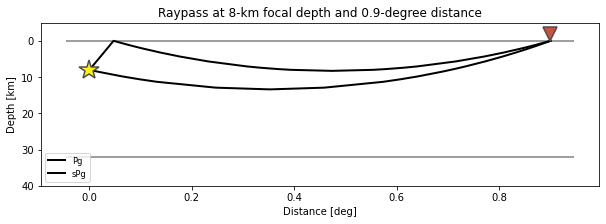

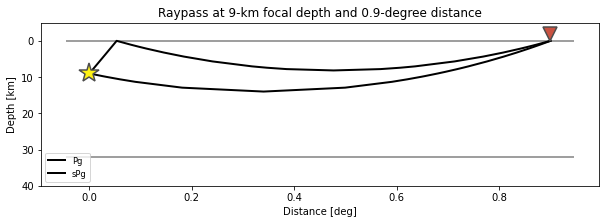

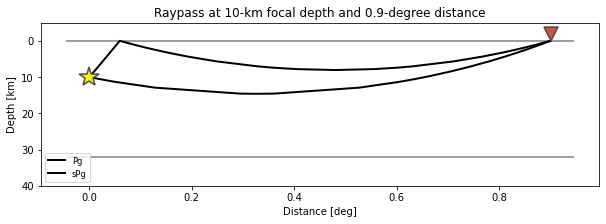

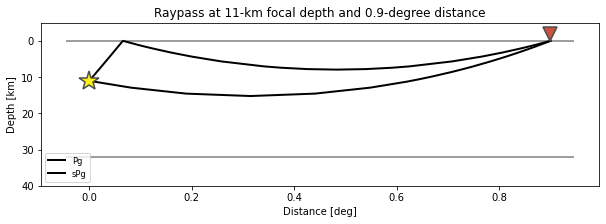

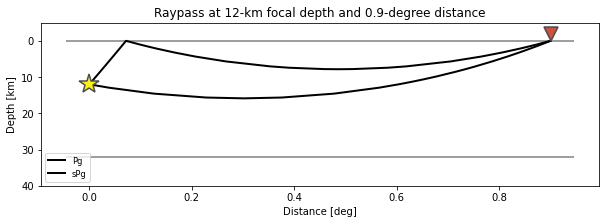

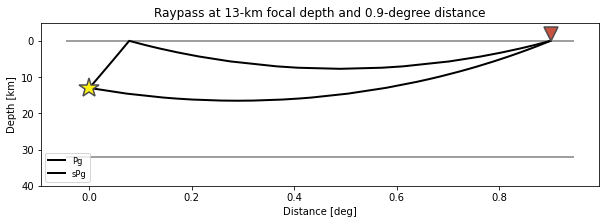

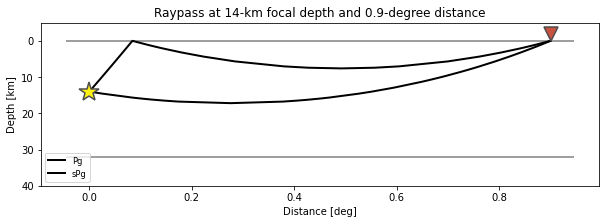

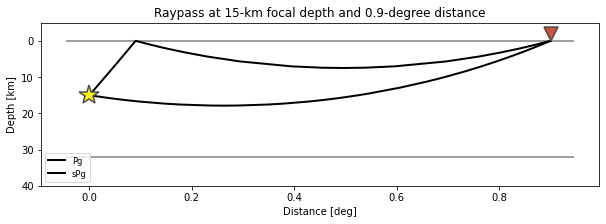

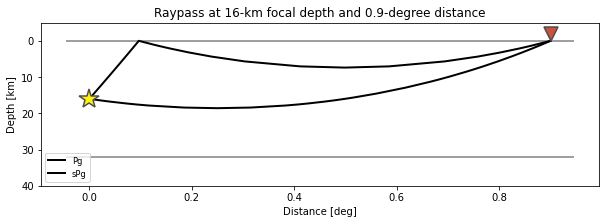

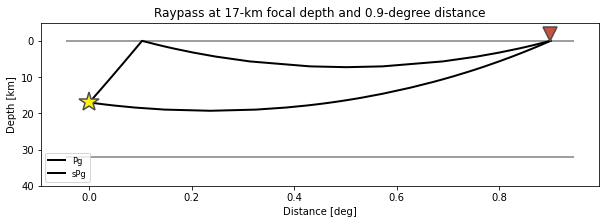

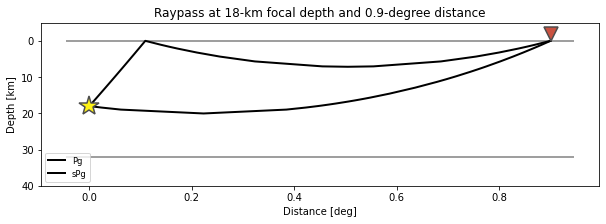

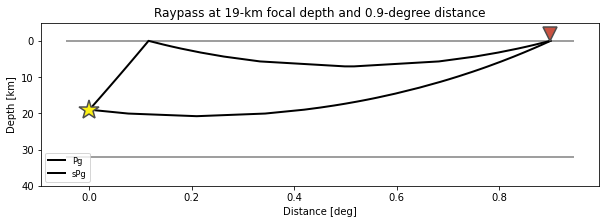

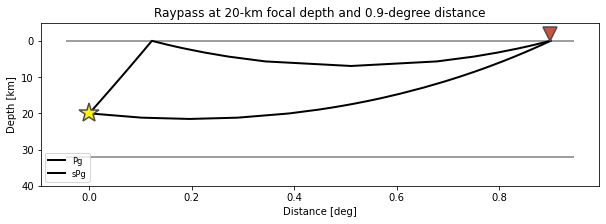

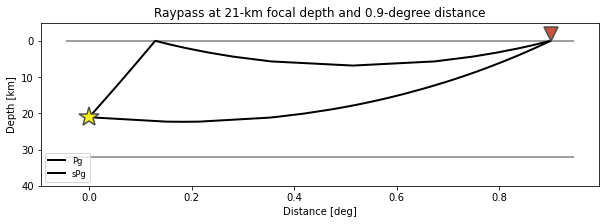

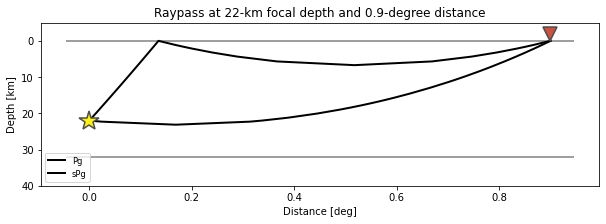

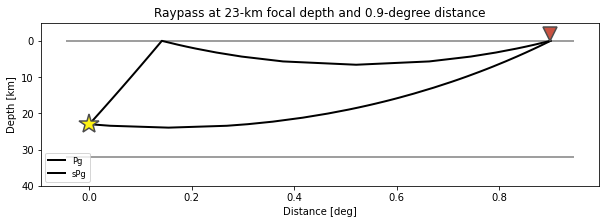

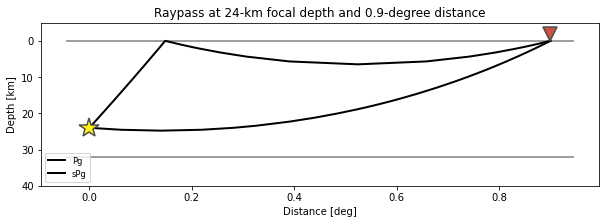

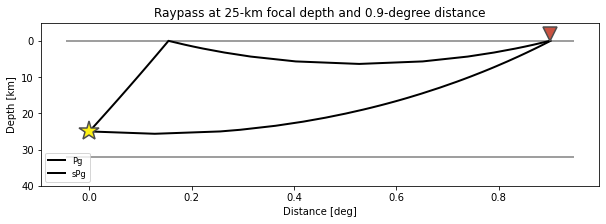

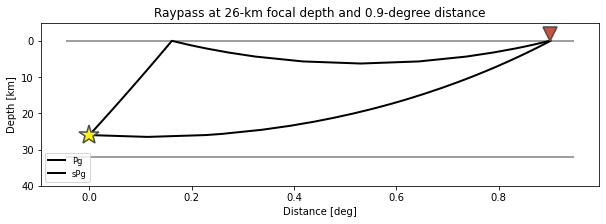

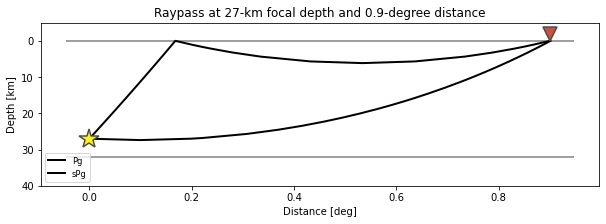

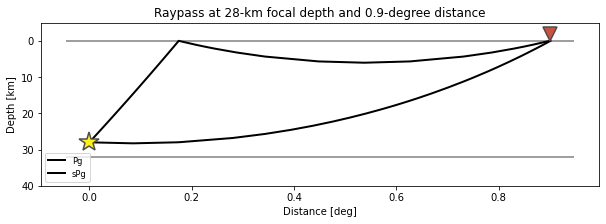

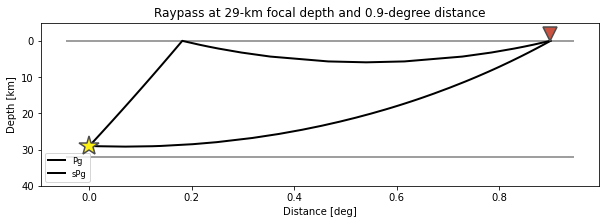

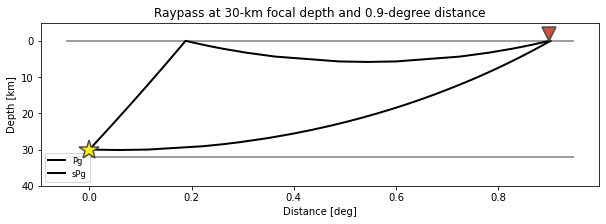

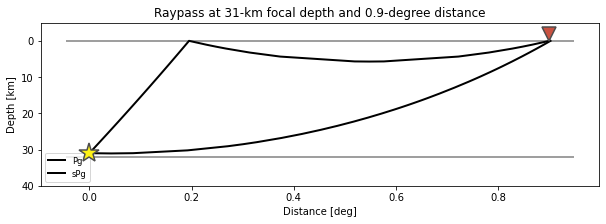

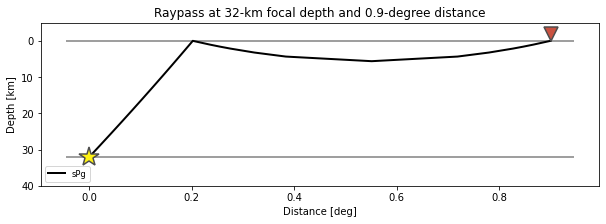

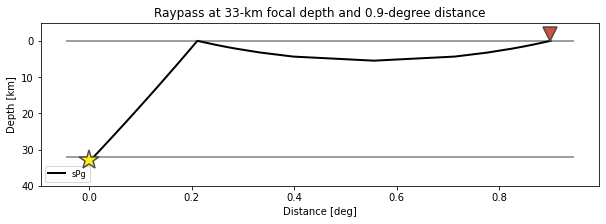

In [36]:
case09_dist = [c for c in range(1, 34)]

for i in case09_dist:
    arrivals_09 = model.get_ray_paths(source_depth_in_km= i, distance_in_degree= 0.9, phase_list=['PmP', 'sPmP', 'Pg', 'sPg', 'Pn', 'sPn'])

    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_ylim(-5,40)
    ax.set_title("Raypass at "+str(i)+"-km focal depth and 0.9-degree distance")
    ax.invert_yaxis()
    arrivals_09.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


In [37]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in case09_dist:
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=dist, distance_in_degree=0.9, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=dist, distance_in_degree= 0.9, phase_list=["sP"])[0].time)


	Fixed Epicentral distance 0.9 degree and Depth range 1 to 33km


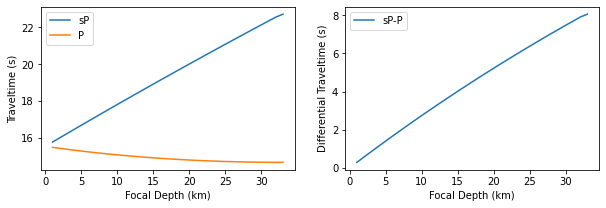

In [38]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
print("\n\tFixed Epicentral distance 0.9 degree and Depth range 1 to 33km")
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Focal Depth (km)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Focal Depth (km)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()

## 2.2 Fixed Epicentral Distance of 2.1 degrees and Focal Depth range 1 to 33 km

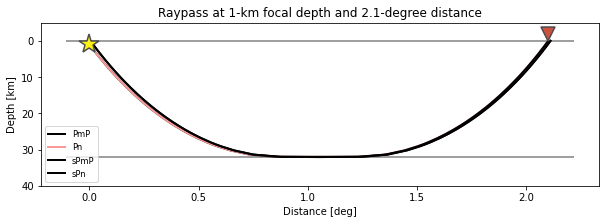

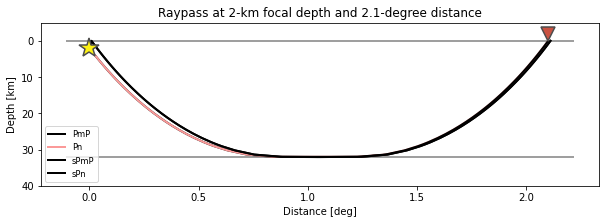

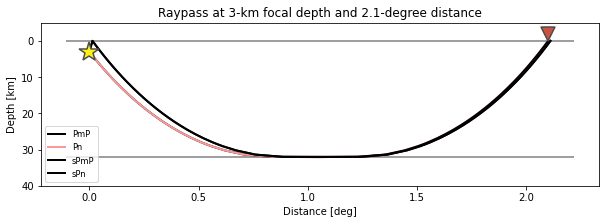

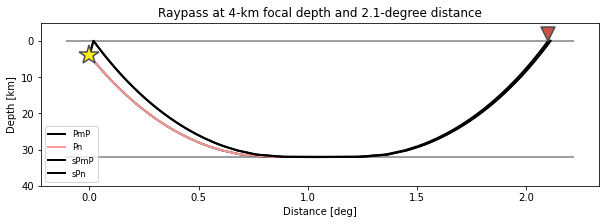

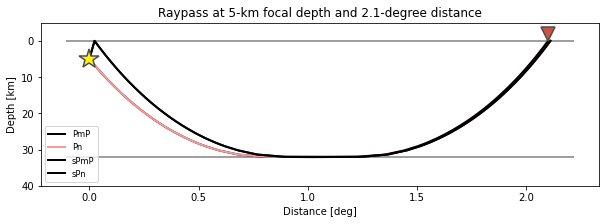

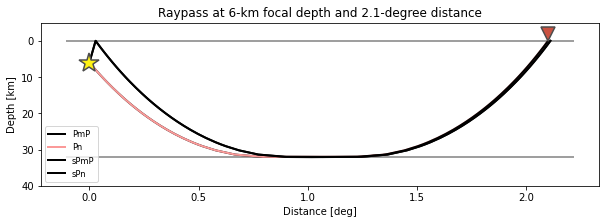

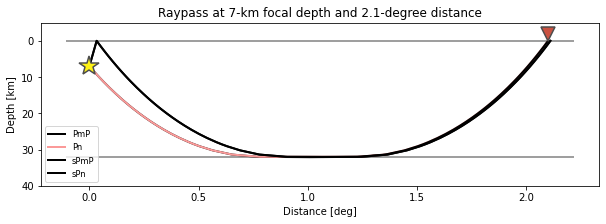

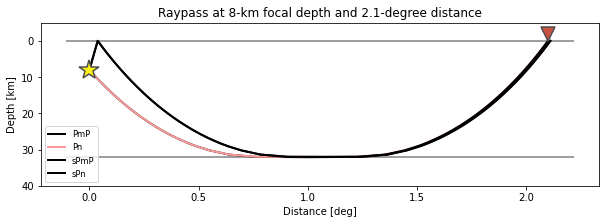

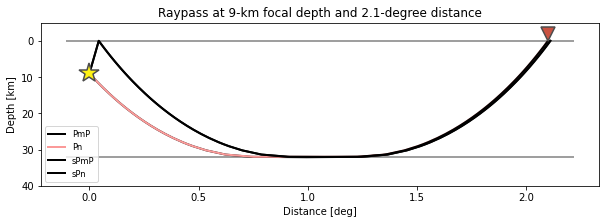

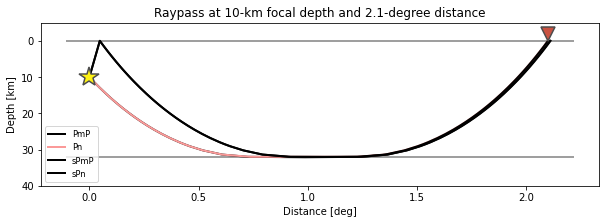

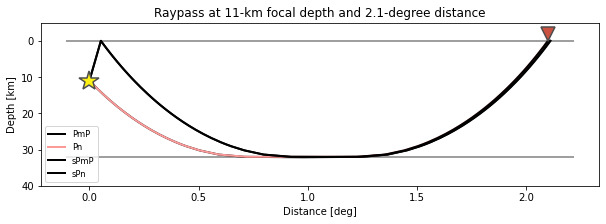

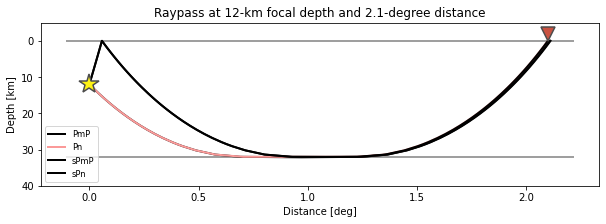

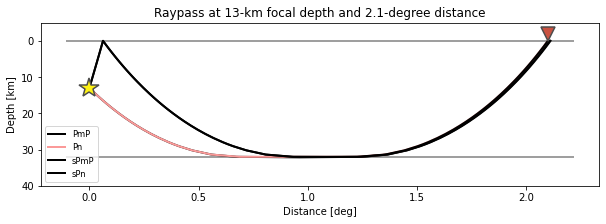

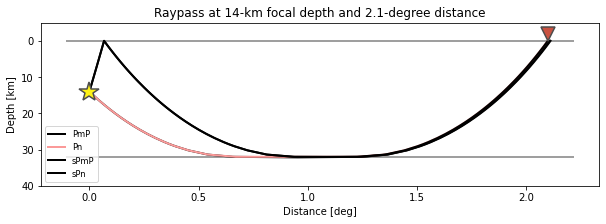

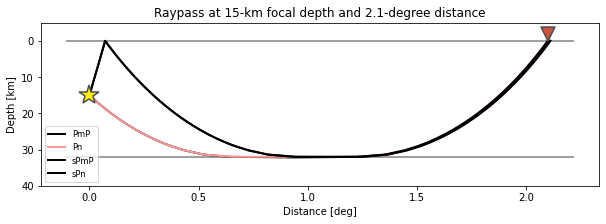

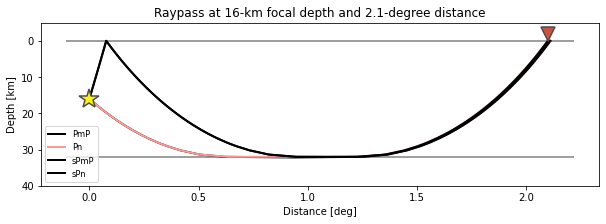

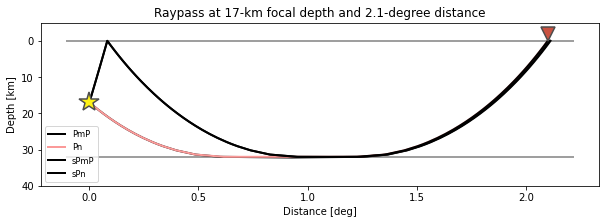

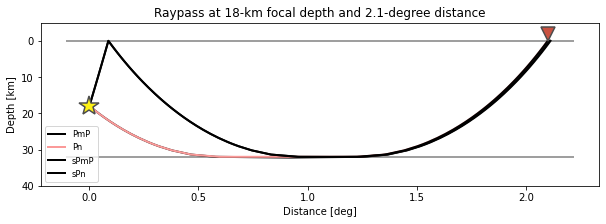

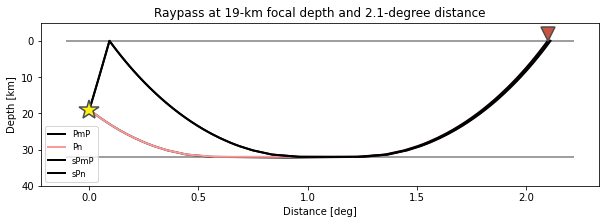

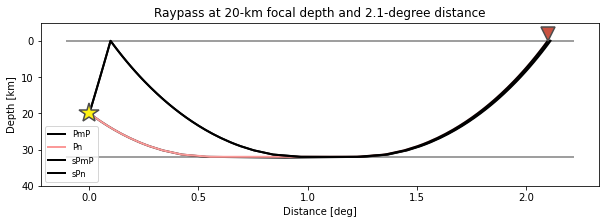

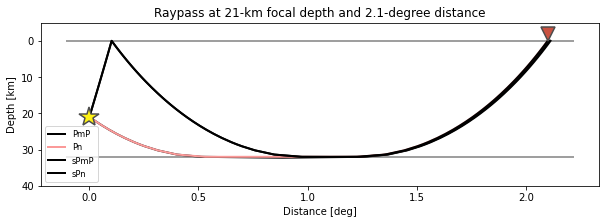

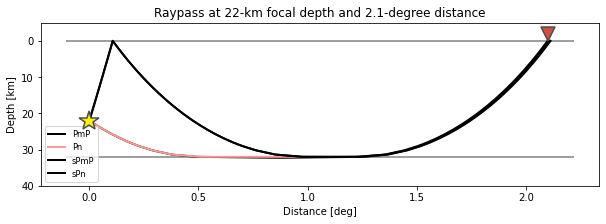

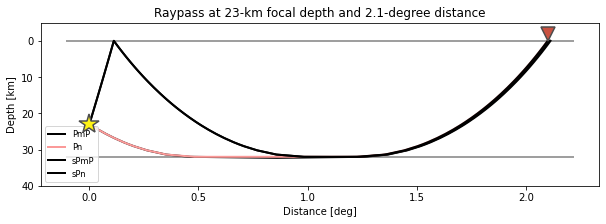

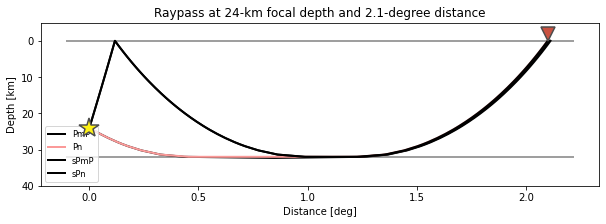

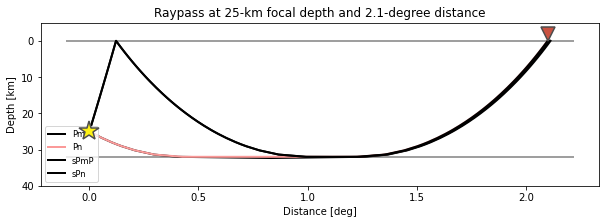

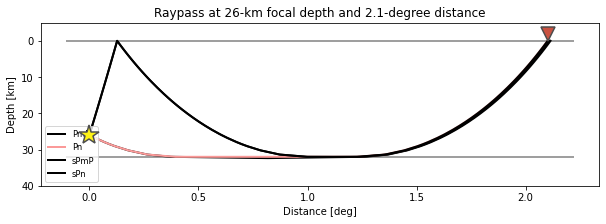

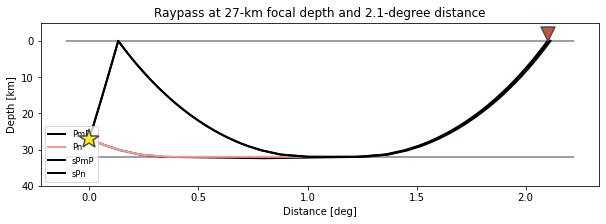

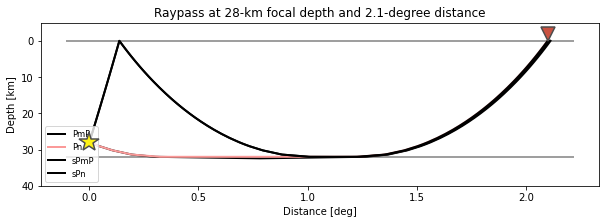

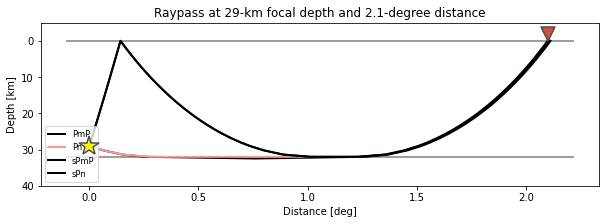

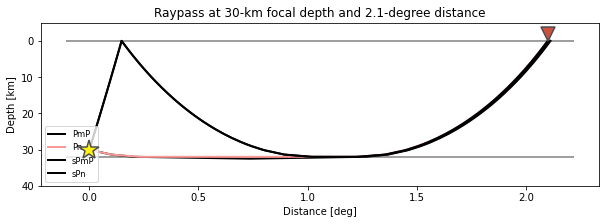

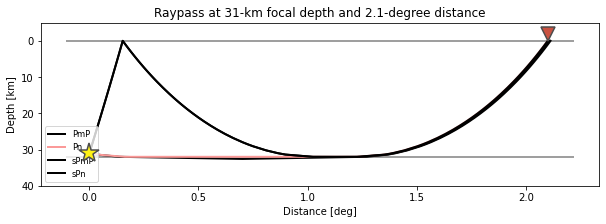

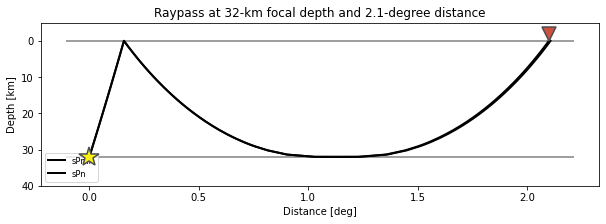

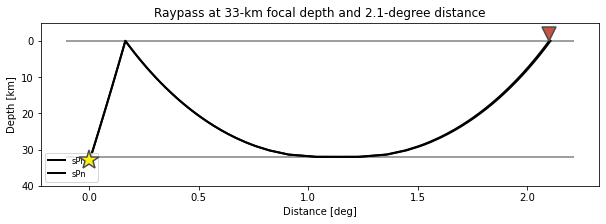

In [39]:
case21_dist = [c for c in range(1, 34)]

for i in case21_dist:
    arrivals_21 = model.get_ray_paths(source_depth_in_km= i, distance_in_degree= 2.1, phase_list=['PmP', 'sPmP', 'Pg', 'sPg', 'Pn', 'sPn'])

    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_ylim(-5,40)
    ax.set_title("Raypass at "+str(i)+"-km focal depth and 2.1-degree distance")
    ax.invert_yaxis()
    arrivals_21.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


In [40]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in case21_dist:
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=dist, distance_in_degree=2.1, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=dist, distance_in_degree= 2.1, phase_list=["sP"])[0].time)


	Fixed Epicentral distance 2.1 degree and Depth range 1 to 33km


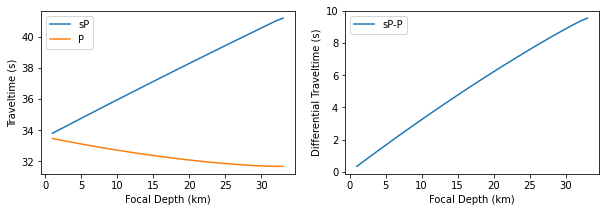

In [41]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
print("\n\tFixed Epicentral distance 2.1 degree and Depth range 1 to 33km")
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Focal Depth (km)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Focal Depth (km)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()

## 2.3 Fixed Epicentral Distance of 4.1 degrees and Focal Depth range 1 to 33 km

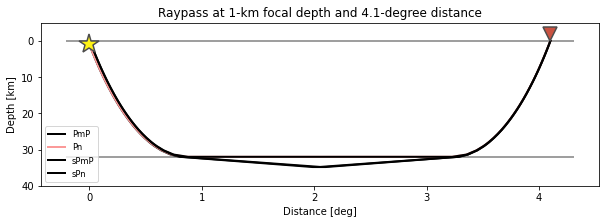

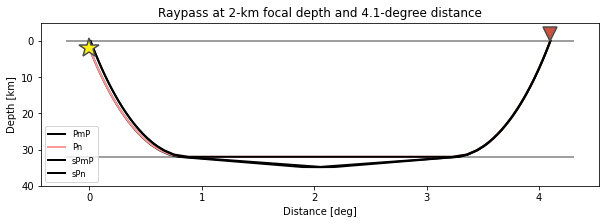

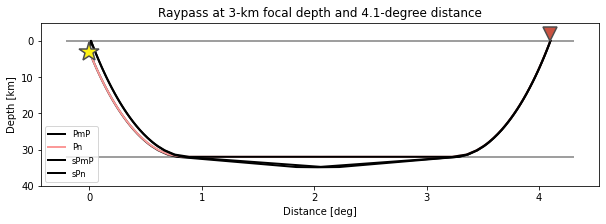

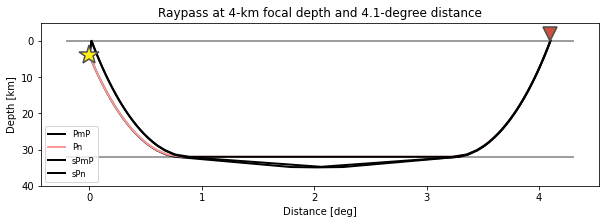

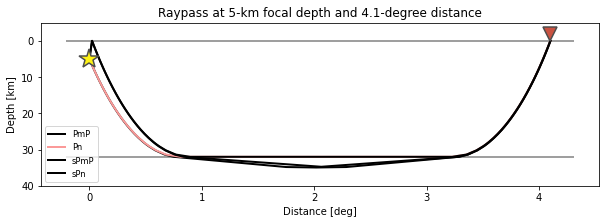

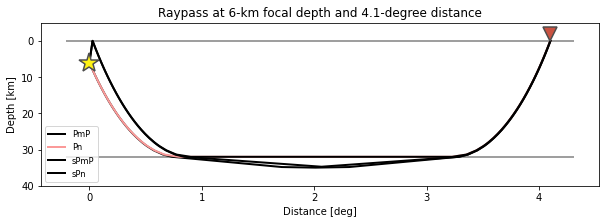

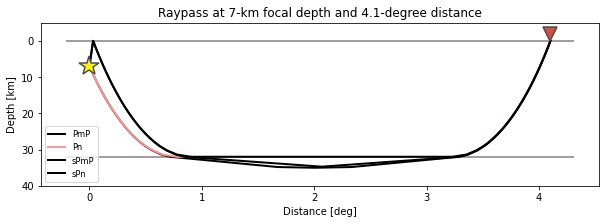

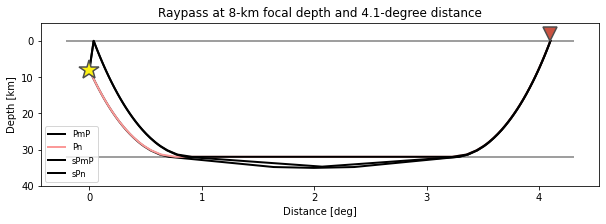

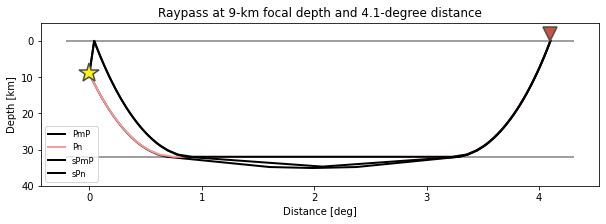

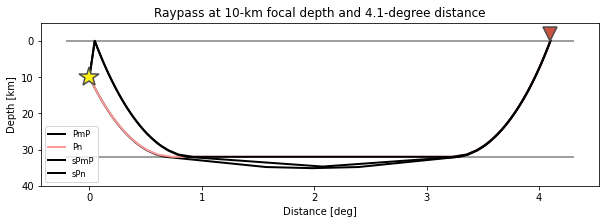

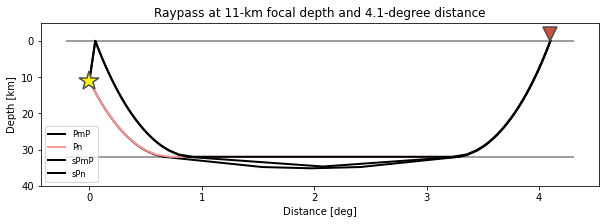

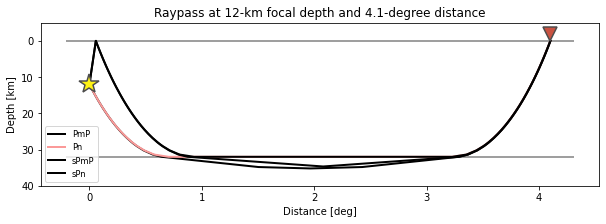

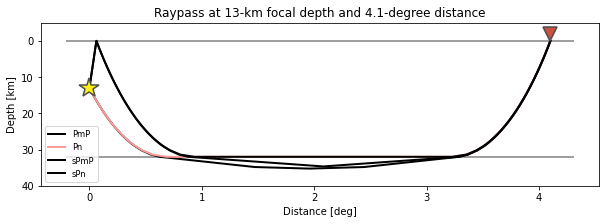

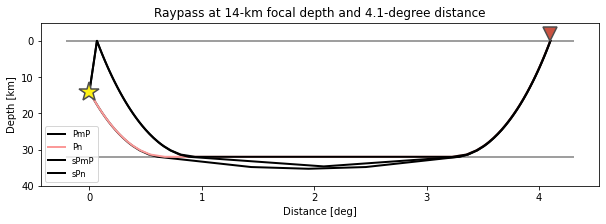

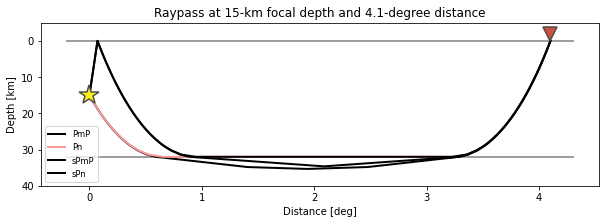

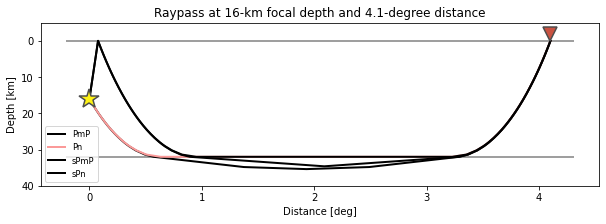

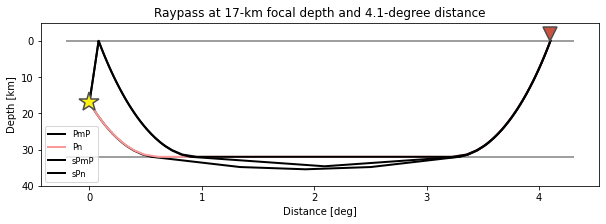

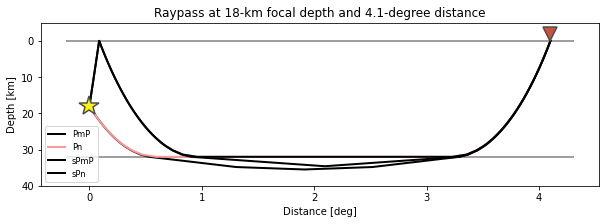

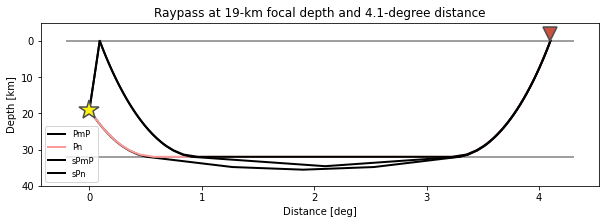

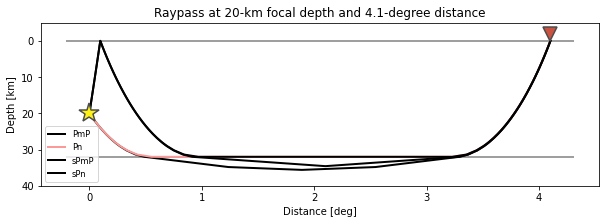

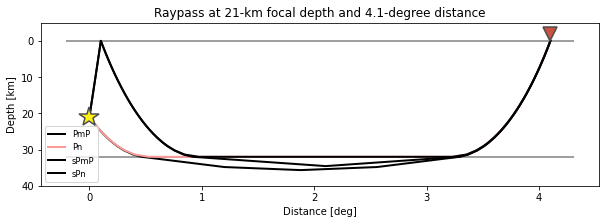

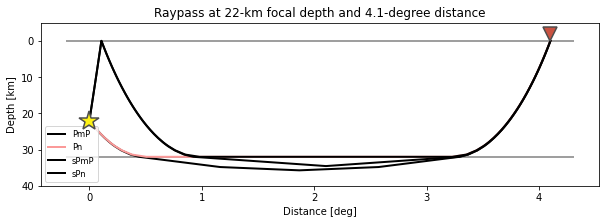

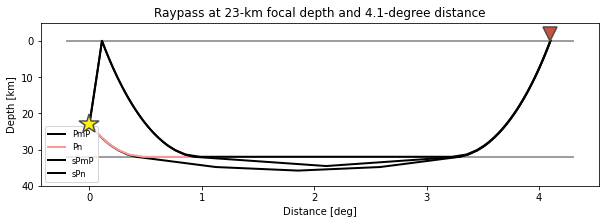

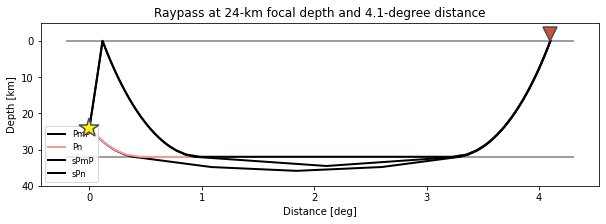

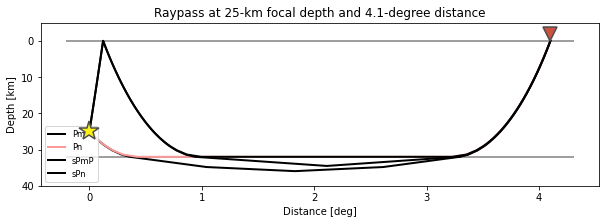

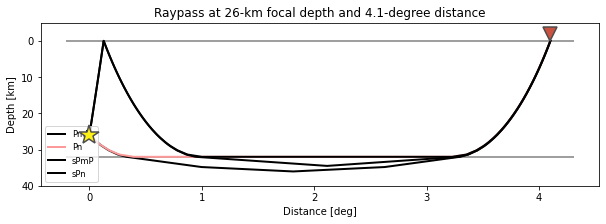

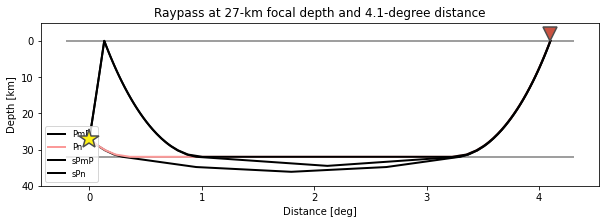

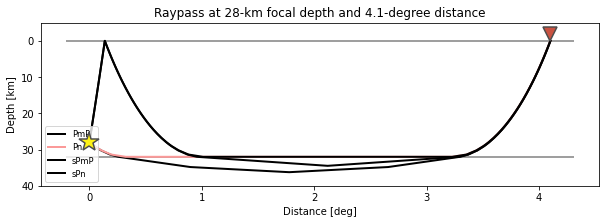

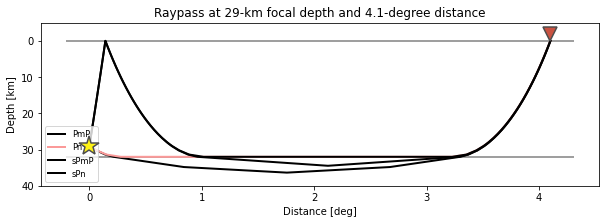

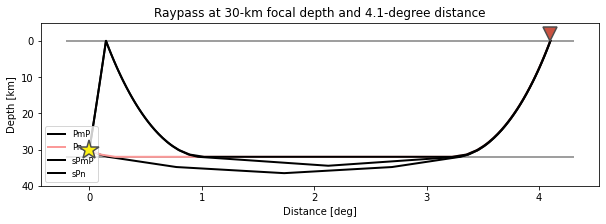

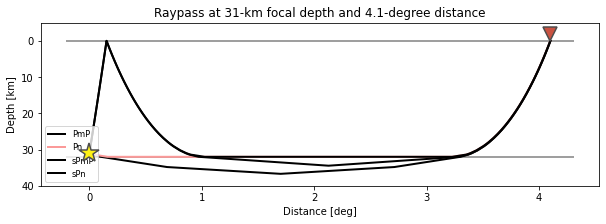

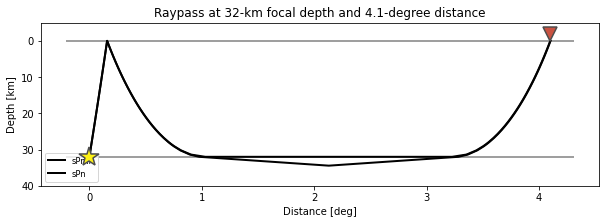

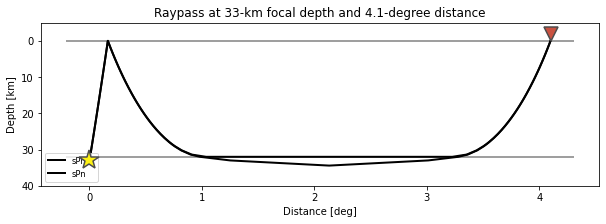

In [42]:
case41_dist = [c for c in range(1, 34)]

for i in case41_dist:
    arrivals_41 = model.get_ray_paths(source_depth_in_km= i, distance_in_degree= 4.1, phase_list=['PmP', 'sPmP', 'Pg', 'sPg', 'Pn', 'sPn'])

    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_ylim(-5,40)
    ax.set_title("Raypass at "+str(i)+"-km focal depth and 4.1-degree distance")
    ax.invert_yaxis()
    arrivals_41.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


In [43]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in case41_dist:
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=dist, distance_in_degree=4.1, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=dist, distance_in_degree= 4.1, phase_list=["sP"])[0].time)


	Fixed Epicentral distance 4.1 degree and Depth range 1 to 33km


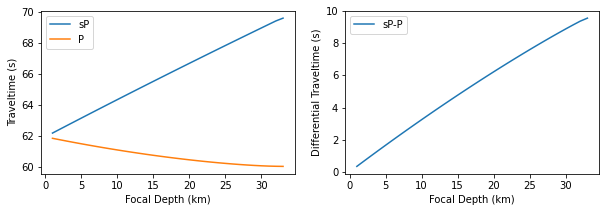

In [44]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
print("\n\tFixed Epicentral distance 4.1 degree and Depth range 1 to 33km")
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Focal Depth (km)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Focal Depth (km)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()

In [45]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in np.arange(0.1,4.1,0.1):
    distance.append(dist)
    TP.append(model.get_travel_times(source_depth_in_km=10, distance_in_degree=dist, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=10, distance_in_degree=dist, phase_list=["sP"])[0].time)

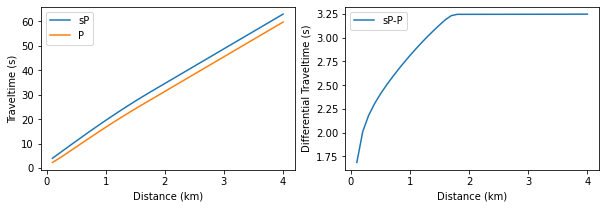

In [46]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Distance (km)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Distance (km)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()

In [47]:
TP

[2.2879884231690757,
 3.7266965299063441,
 5.3149912573300684,
 6.9440949203667959,
 8.5834839828341529,
 10.220573236786919,
 11.848518673353384,
 13.462971573007,
 15.060602892494725,
 16.639003187010168,
 18.196302052635772,
 19.730966640993636,
 21.241770662256251,
 22.727727647298902,
 24.188125469885655,
 25.622444313147131,
 27.041001283232738,
 28.45941181060666,
 29.877813247231074,
 31.296201161560568,
 32.714571222906535,
 34.132919172949144,
 35.551240809910396,
 36.969531978437502,
 38.387788562570222,
 39.806006480568946,
 41.224181680951901,
 42.642310139362763,
 44.060387856033344,
 45.478410853687237,
 46.896375175777422,
 48.314276884987514,
 49.732112061939048,
 51.149876804065173,
 52.567567224623616,
 53.985179451822184,
 55.402709628037712,
 56.820153909118702,
 58.237491587692006,
 59.654762663478706]